# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data

In [2]:
data=pd.read_csv('/Users/shailendrapatil/Fall2017/Machine Learning A-Z Template Folder/Projects/House Price Advanced Regression Techniques/train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

# Checking SalePrice Distribution

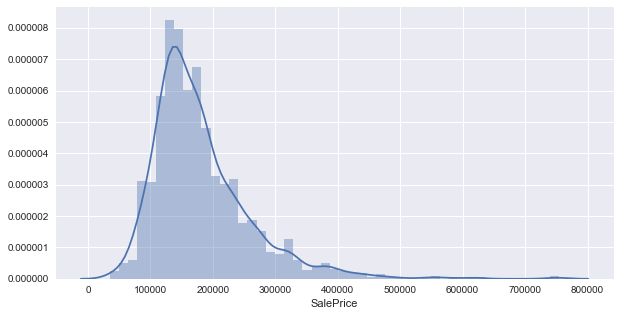

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(data['SalePrice'])

Sales Price has is right skewed , hence we need to take log transformation

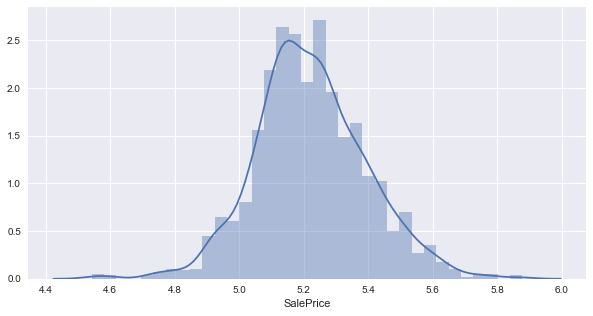

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(data['SalePrice']))

This suggests the Target variable after log transformation is normal

# Missing Data

First Lets Drop Id

In [7]:
del(data['Id'])

In [8]:
data.shape

(1460, 80)

In [9]:
missing_data = (data.isnull().sum() / len(data)) * 100

In [10]:
missing_data=missing_data.sort_values(ascending=False)

In [11]:
missing_data

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [12]:
missing_data=missing_data[missing_data>0]

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


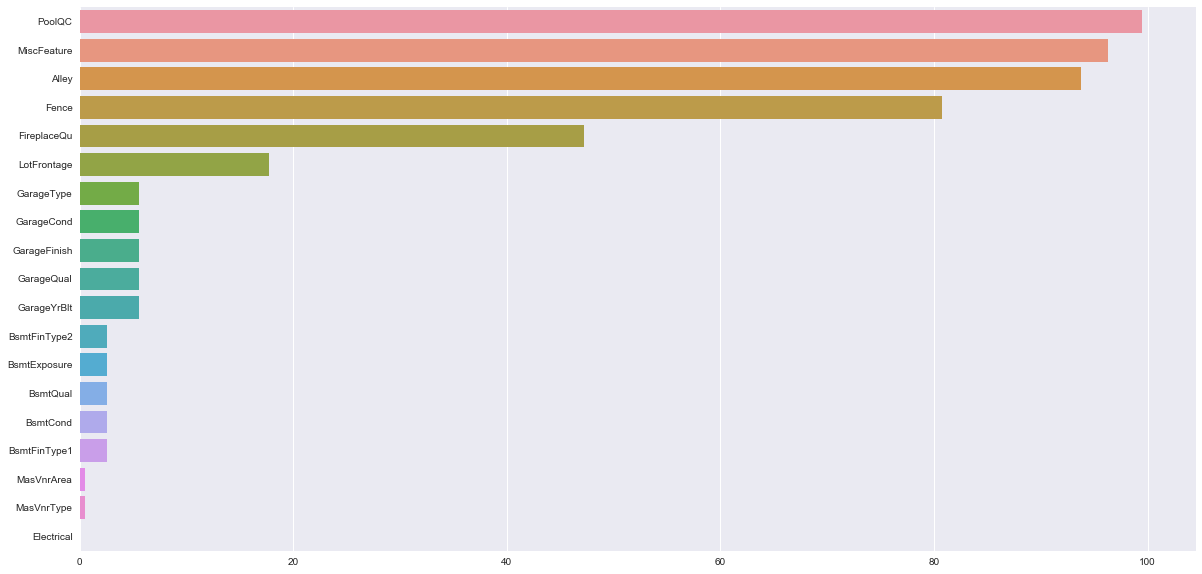

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=missing_data.values,y=missing_data.index)

## PoolQC

In [14]:
data['PoolQC']=data['PoolQC'].fillna('No')

In [15]:
data['PoolQC'].value_counts()

No    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


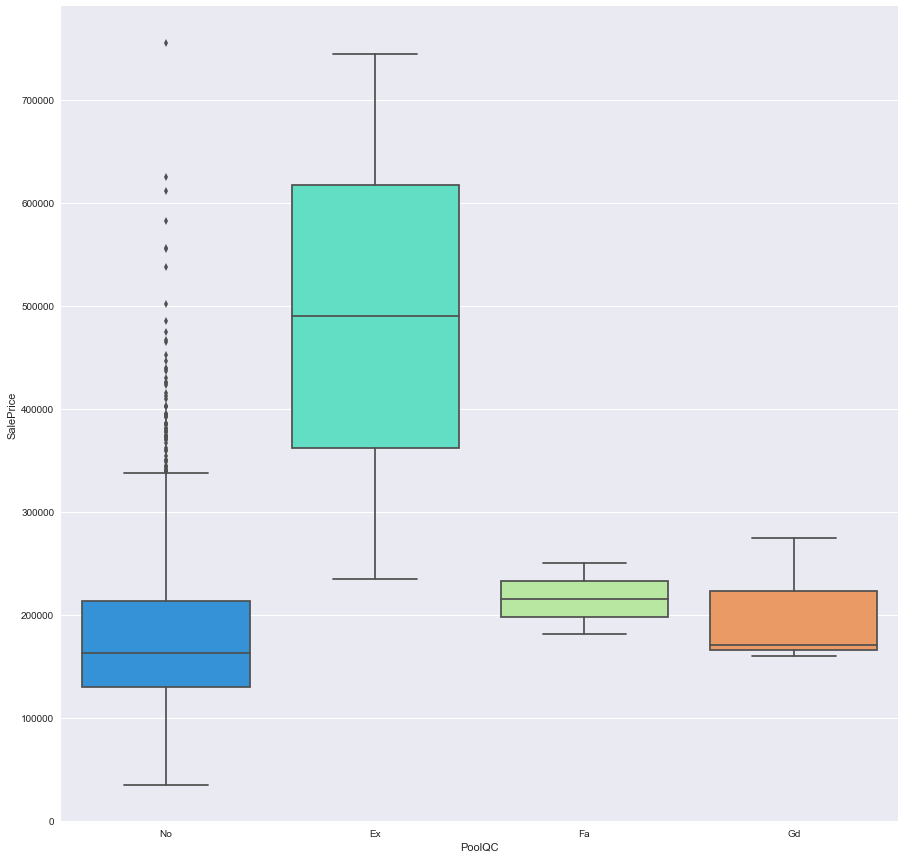

In [16]:
plt.figure(figsize=(15,15))
sns.boxplot(x="PoolQC", y="SalePrice", data=data,palette='rainbow')

In [17]:
pool_access=data['PoolQC']
pool= [0 if pool=='No' else 1 for pool in pool_access]
data['pool']=pool

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


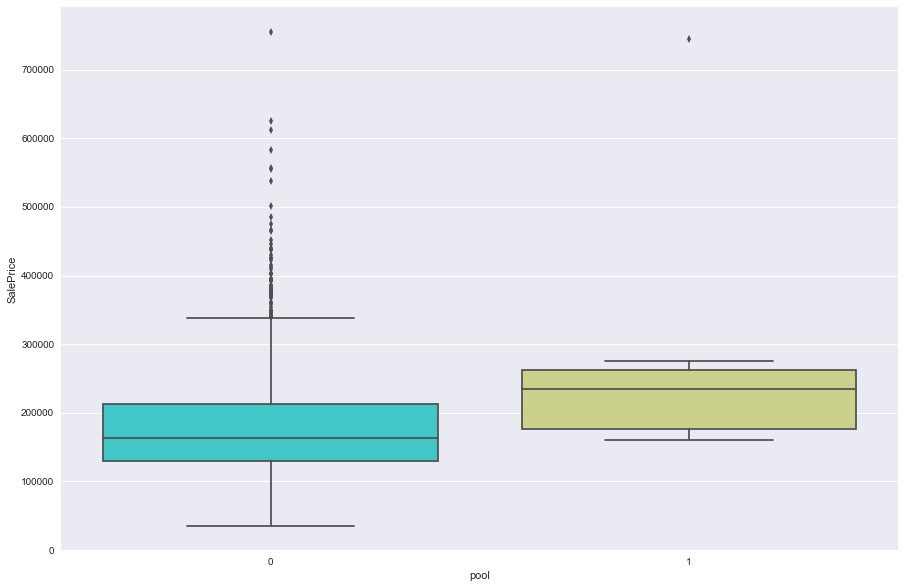

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x="pool", y="SalePrice", data=data,palette='rainbow')

Just by keeping if there is pool or not , should be a good feature. We will keep this and remove the PoolQC and also we will remove pool area

In [19]:
del(data['PoolQC'])
del(data['PoolArea'])

In [20]:
data.shape

(1460, 79)

## MiscFeature

In [21]:
data['MiscFeature']=data['MiscFeature'].fillna('No')

In [22]:
data['MiscFeature'].value_counts()

No      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


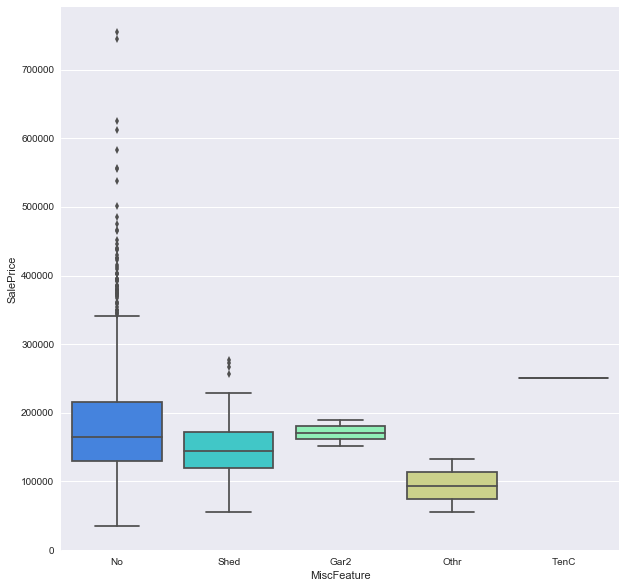

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x="MiscFeature", y="SalePrice", data=data,palette='rainbow')

There isnt much relation here , hence we will drop this column

In [24]:
del(data['MiscFeature'])

In [25]:
data.shape

(1460, 78)

## Alley

In [26]:
data['Alley']=data['Alley'].fillna('No')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


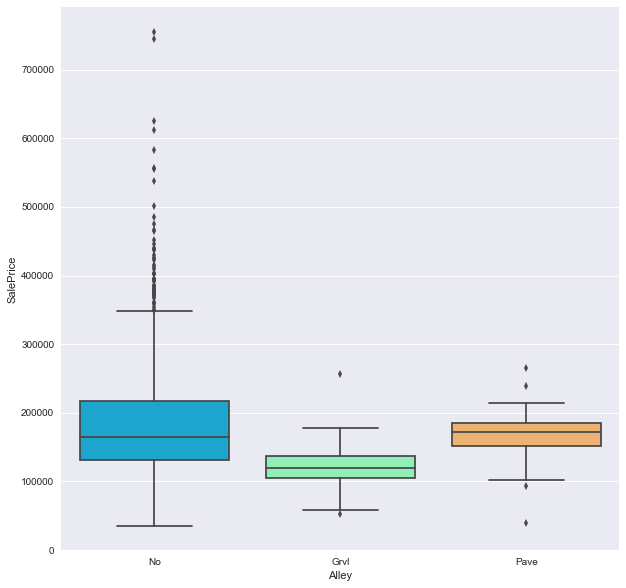

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Alley", y="SalePrice", data=data,palette='rainbow')

Looking at the boox plot we can say that there isnt any signifcant importance of Alley on SalePrie and hence we can drop it

In [28]:
del(data['Alley'])

In [29]:
data.shape

(1460, 77)

## Fence

In [30]:
data['Fence']=data['Fence'].fillna('No')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


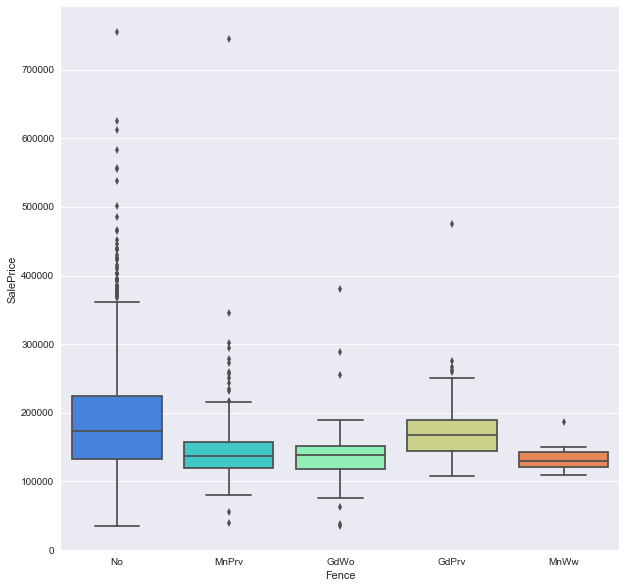

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Fence", y="SalePrice", data=data,palette='rainbow')

No Major difference in SalePrice based on Fence , hence we can drop this column

In [32]:
del(data['Fence'])

In [33]:
data.shape

(1460, 76)

## FireplaceQu

In [34]:
data['FireplaceQu']=data['FireplaceQu'].fillna('No')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


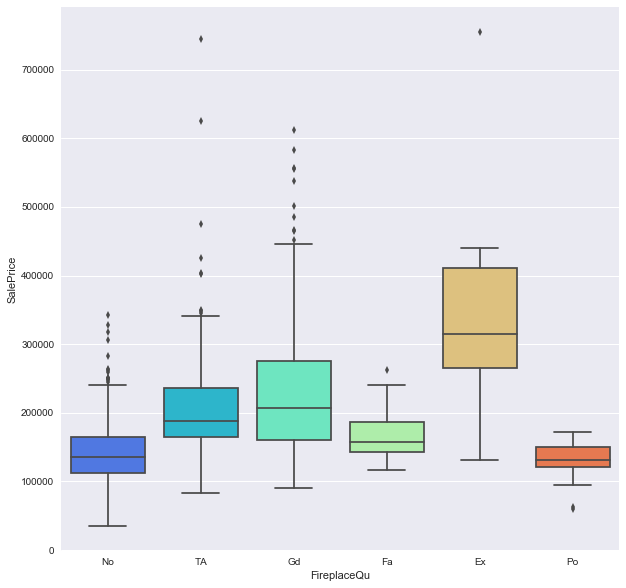

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x="FireplaceQu", y="SalePrice", data=data,palette='rainbow')

As seen when there is no FireplaceQu , then SalePrice is less compared to other values. 
Hence we can create a new variable. 

In [36]:
fireplace_acces=data['FireplaceQu']
fireplaceacess= [0 if fire=='No' else 1 for fire in fireplace_acces]
data['fireplaceacess']=fireplaceacess

In [37]:
data['fireplaceacess'].value_counts()

1    770
0    690
Name: fireplaceacess, dtype: int64

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


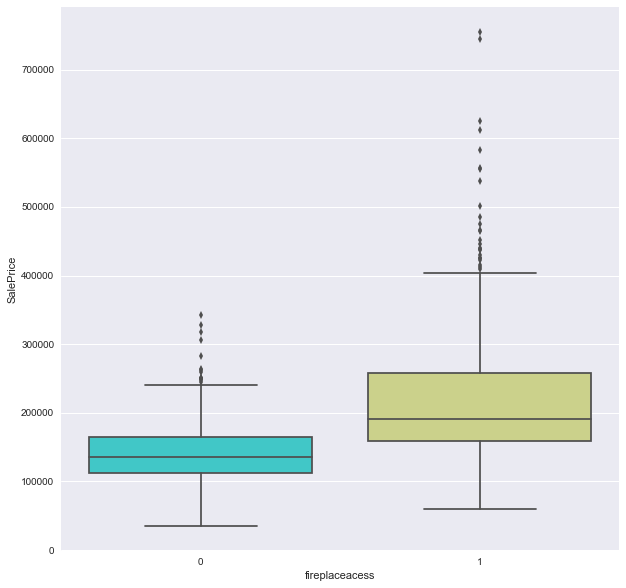

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x="fireplaceacess", y="SalePrice", data=data,palette='rainbow')

So this looks like an important relation between Fireplaceacess and Sale Price.
Hence we will keep this and delete other variable

In [39]:
del(data['FireplaceQu'])

In [40]:
data['fireplaceacess'].value_counts()

1    770
0    690
Name: fireplaceacess, dtype: int64

In [41]:
data.shape

(1460, 76)

## LotFrontage

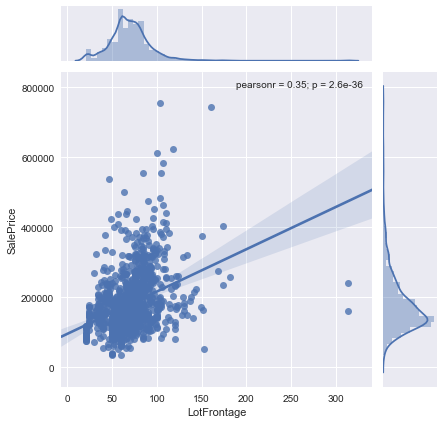

In [42]:
sns.jointplot(x='LotFrontage',y='SalePrice',data=data,kind='reg')

In [43]:
temp=np.log10(data.loc[:,['LotFrontage','SalePrice']])

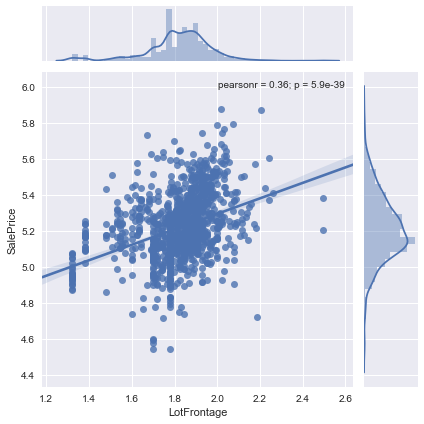

In [44]:
sns.jointplot(x='LotFrontage',y='SalePrice',data=temp,kind='reg')

LotFrontage has 18% missing values and we see the correlation between LotFrontage and sales price 
is less and hence instead of imputing we will remove this column

In [45]:
del(data["LotFrontage"])

In [46]:
data.shape

(1460, 75)

## GarageType

In [47]:
data['GarageType']=data['GarageType'].fillna('No')

In [48]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


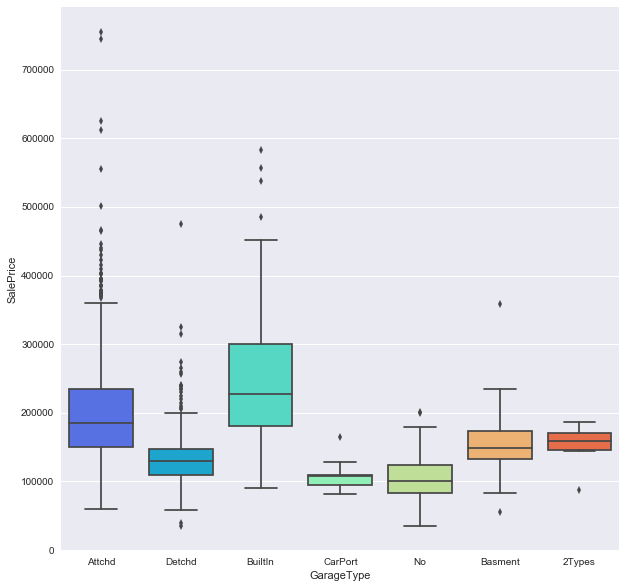

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x="GarageType", y="SalePrice", data=data,palette='rainbow')

In [50]:
garage=data['GarageType']
garage_access= [0 if gar=='No' else 1 for gar in garage]
data['garage_access']=garage_access

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


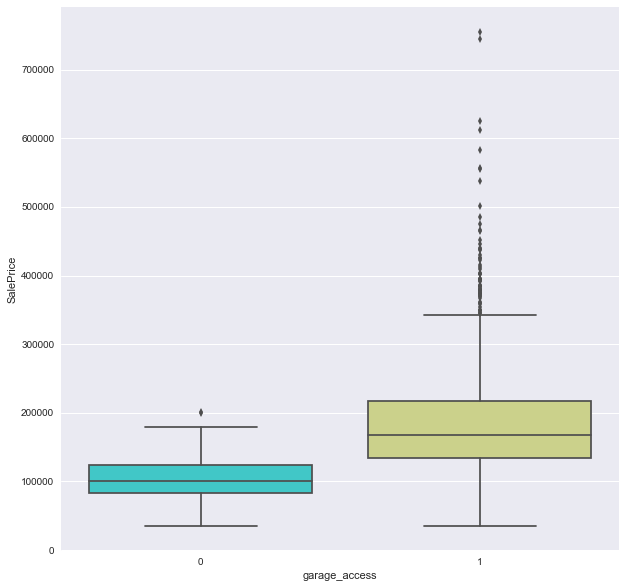

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(x="garage_access", y="SalePrice", data=data,palette='rainbow')

In [52]:
data['GarageCond']=data['GarageCond'].fillna('No')

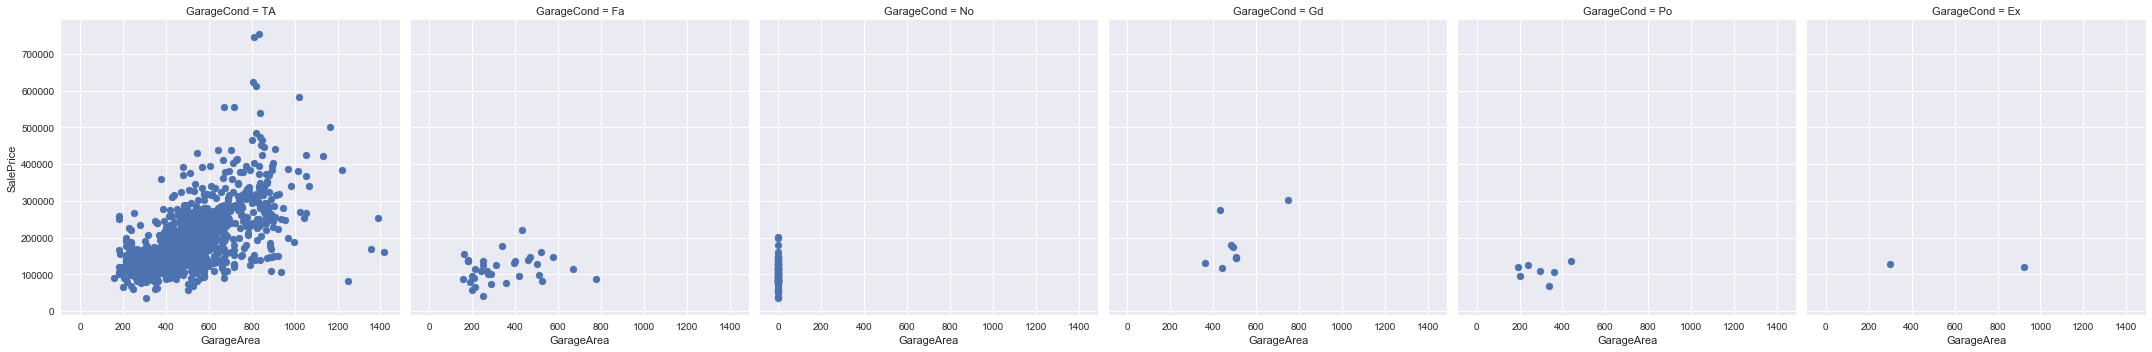

In [53]:
plt.figure(figsize=(10,10))
grid = sns.FacetGrid(data, col='GarageCond',size=5)
grid.map(plt.scatter,'GarageArea','SalePrice')

In case of features related to Garage we can see that we can conclude only on GarageArea relation 
with SalePrice and remove all other Garage features. 'GarageType', 'GarageCond','garage_access',
'GarageQual','GarageCars','GarageYrBlt','GarageFinish',

In [54]:
del(data['GarageType'])
del(data['GarageCars'])
del(data['GarageCond'])
del(data['GarageFinish'])
del(data['GarageQual'])
del(data['GarageYrBlt'])
del(data['garage_access'])

## Basement

'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'

In [55]:
data['BsmtQual']=data['BsmtQual'].fillna('None')

In [56]:
data['BsmtExposure']=data['BsmtExposure'].fillna('None')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


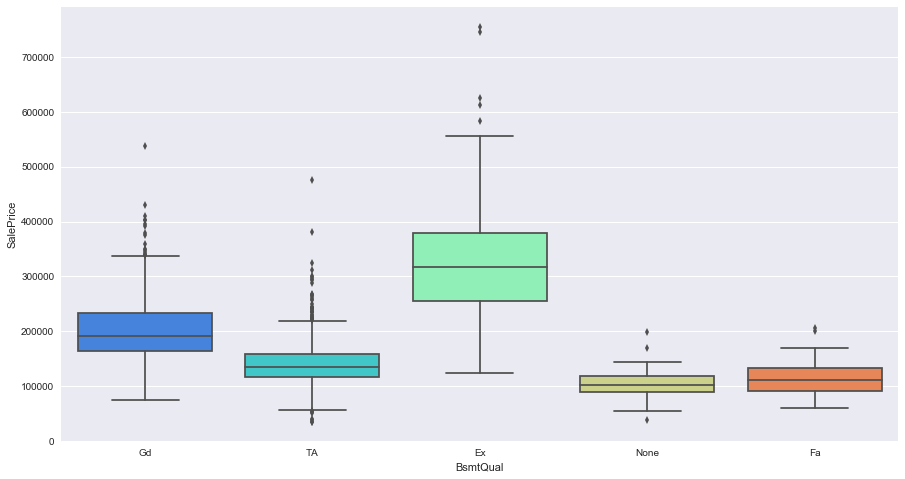

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(x="BsmtQual", y="SalePrice", data=data,palette='rainbow')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


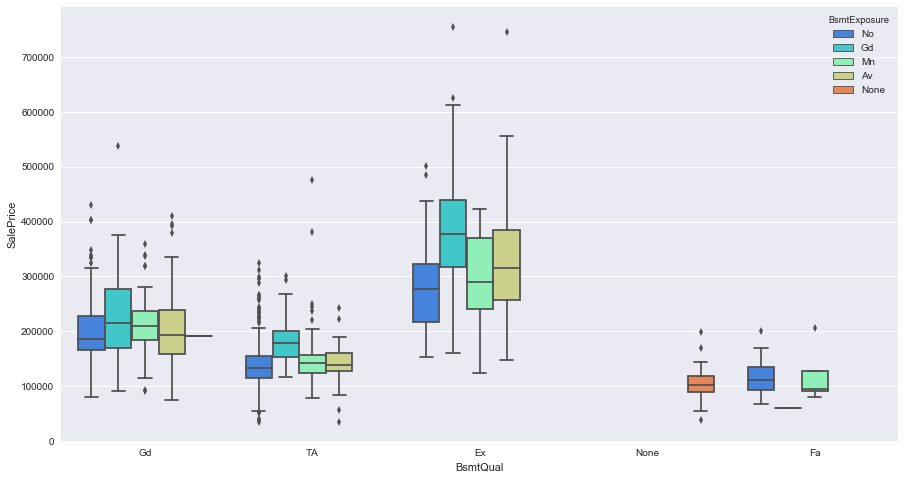

In [58]:
plt.figure(figsize=(15,8))
sns.boxplot(x="BsmtQual", y="SalePrice", data=data,hue='BsmtExposure',palette='rainbow')

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


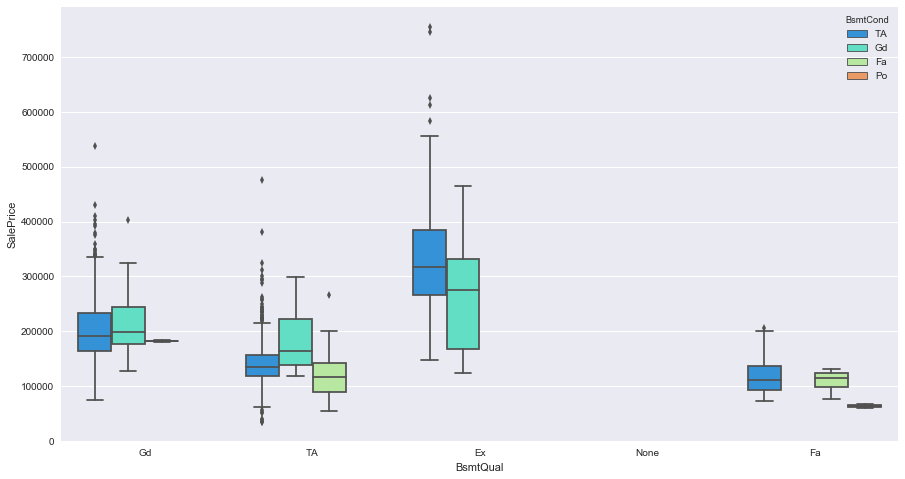

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(x="BsmtQual", y="SalePrice", data=data,hue='BsmtCond',palette='rainbow')

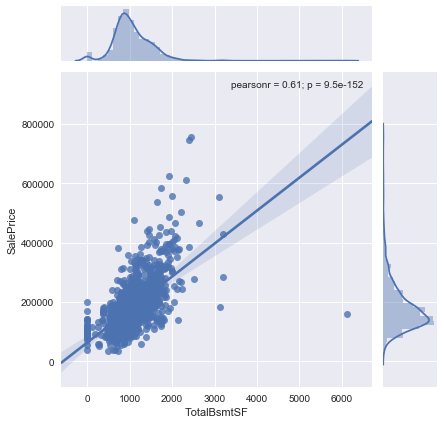

In [60]:
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=data,kind='reg')

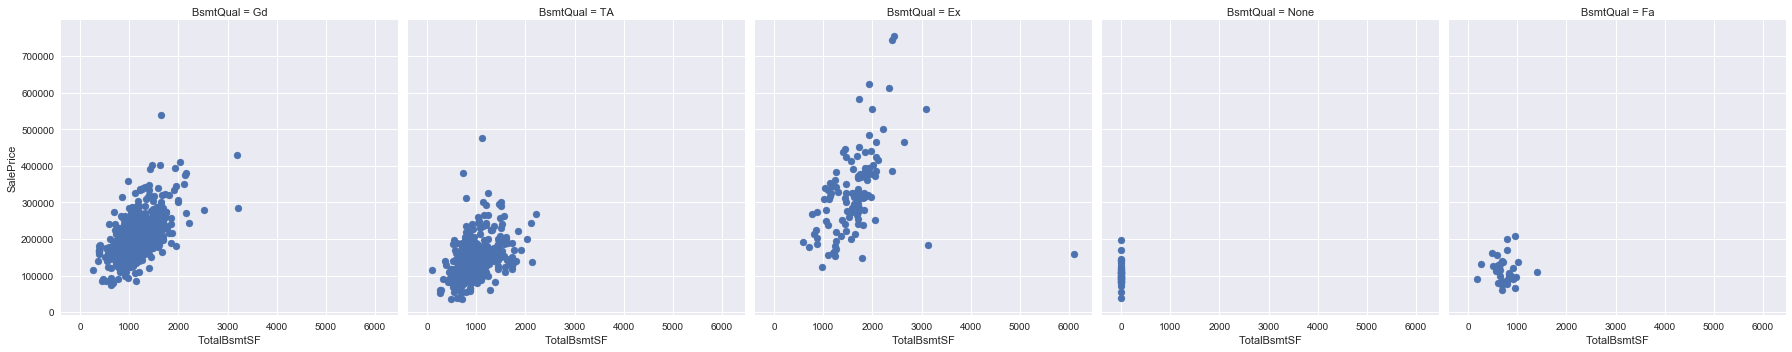

In [61]:
grid = sns.FacetGrid(data, col='BsmtQual',size=5)
grid.map(plt.scatter,'TotalBsmtSF','SalePrice')

For Basement parameters we see that BsmtQual and TotalBsmtSF have relation with Sales Price. And we also see that
from the faceted graph that for same TotalBsmtSF and Excellent BsmtQual, SalePrice are high. 
Hence we choose both these and delete the others parameters

In [62]:
del(data['BsmtCond'])
del(data['BsmtExposure'])
del(data['BsmtFinSF1'])
del(data['BsmtFinSF2'])
del(data['BsmtFinType1'])
del(data['BsmtFinType2'])
del(data['BsmtFullBath'])
del(data['BsmtHalfBath'])
del(data['BsmtUnfSF'])

## Masonry

In [63]:
data['MasVnrType'].isnull().sum()/len(data)*100

0.547945205479452

In [64]:
data['MasVnrArea'].isnull().sum()/len(data)*100

0.547945205479452

Since % of missing values is less then 1% we can remove these rows

## Electrical

In [65]:
data['Electrical'].isnull().sum()/len(data)*100

0.0684931506849315

This less then 0.07% hence we can remove the respective rows

In [66]:
data.shape

(1460, 60)

In [67]:
data.dropna(axis=0,inplace=True)

In [68]:
data.shape

(1451, 60)

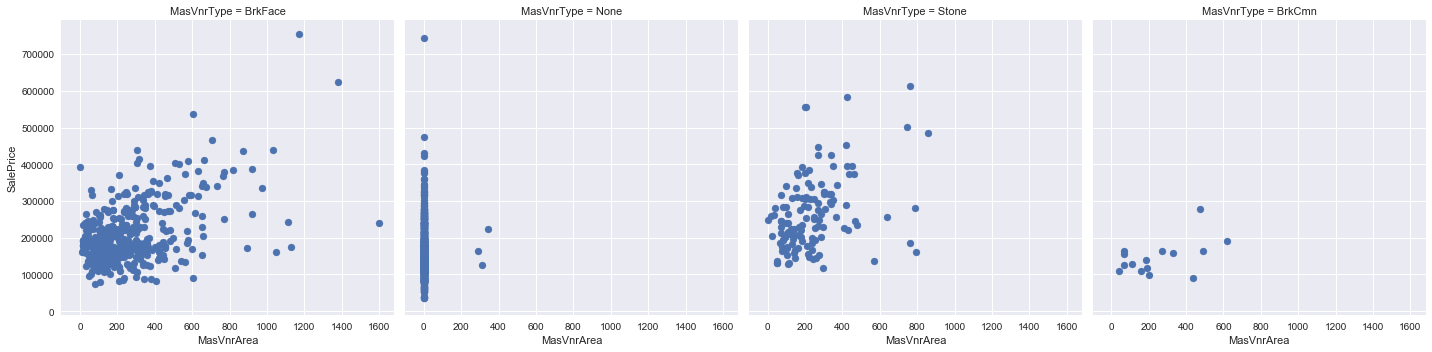

In [69]:
grid = sns.FacetGrid(data, col='MasVnrType',size=5)
grid.map(plt.scatter,'MasVnrArea','SalePrice')

In [70]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood      ...       3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr      ...               0           0   
1       FR2       Gtl      Veenker      ...               0           0   
2    Inside       Gtl      CollgCr      ...               0           0   
3    Corner       Gtl      Crawfor      ...               0           0   
4       FR2       Gtl      NoRidge      ...               0           0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice pool  \
0       0      2    2008        WD         Normal     208500    0   
1       0      5    2007        WD         Normal     181500    0   
2       0      9    2008        WD         Normal     223500    0   
3       0      2    2006        WD        Abnorml     140000    0   
4       0     12    2008        WD         Normal     250000    0   

  fireplaceacess  
0              0  
1              1  
2              1  
3              1  
4              1  

[5 rows x 60 columns]

## Checking for constant Features

In [71]:
categorical_features=[col for col in data.columns if len(data[col].unique())==1]

In [72]:
categorical_features

[]

## Checking for Quasi Constant Features

In [73]:
Quasi_constant_features=[]
for feature in data.columns:
    predominant=(data[feature].value_counts()/np.float(len(data[feature]))).sort_values(ascending=False).values[0]
    if predominant>0.998:
        Quasi_constant_features.append(feature)
                 

In [74]:
data['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

We will remove this column

In [75]:
del[data['Utilities']]

In [76]:
data.shape

(1451, 59)

## Checking for Duplicated Columns

In [77]:
data_t=data.T
data_t.head()

0     1      2     3      4      5      6      7     8     9     \
MSSubClass    60    20     60    70     60     50     20     60    50   190   
MSZoning      RL    RL     RL    RL     RL     RL     RL     RL    RM    RL   
LotArea     8450  9600  11250  9550  14260  14115  10084  10382  6120  7420   
Street      Pave  Pave   Pave  Pave   Pave   Pave   Pave   Pave  Pave  Pave   
LotShape     Reg   Reg    IR1   IR1    IR1    IR1    Reg    IR1   Reg   Reg   

            ...   1450  1451  1452   1453  1454  1455   1456  1457  1458  1459  
MSSubClass  ...     90    20   180     20    20    60     20    70    20    20  
MSZoning    ...     RL    RL    RM     RL    FV    RL     RL    RL    RL    RL  
LotArea     ...   9000  9262  3675  17217  7500  7917  13175  9042  9717  9937  
Street      ...   Pave  Pave  Pave   Pave  Pave  Pave   Pave  Pave  Pave  Pave  
LotShape    ...    Reg   Reg   Reg    Reg   Reg   Reg    Reg   Reg   Reg   Reg  

[5 rows x 1451 columns]

In [78]:
data_t.duplicated().sum()

0

There are no duplicated columns

## Getting highly correlated Features

In [79]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(data, 0.8)
len(set(corr_features))

3

In [81]:
corr_features

{'1stFlrSF', 'TotRmsAbvGrd', 'fireplaceacess'}

In [82]:
data['fireplaceacess'].value_counts()

1    766
0    685
Name: fireplaceacess, dtype: int64

In [83]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = data.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

feature1        feature2      corr
0  fireplaceacess      Fireplaces  0.900752
1      Fireplaces  fireplaceacess  0.900752
2    TotRmsAbvGrd       GrLivArea  0.825563
3       GrLivArea    TotRmsAbvGrd  0.825563
4     TotalBsmtSF        1stFlrSF  0.818107

In [84]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(data.shape[1]))

found 3 correlated groups
out of 59 total features


In [85]:
for group in correlated_groups:
    print(group)
    print()

         feature1    feature2      corr
0  fireplaceacess  Fireplaces  0.900752

       feature1   feature2      corr
2  TotRmsAbvGrd  GrLivArea  0.825563

      feature1  feature2      corr
4  TotalBsmtSF  1stFlrSF  0.818107



## Checking Using Random Forest which features to keep from above correlated

In [86]:
group = correlated_groups[0]
from sklearn.ensemble import RandomForestRegressor
features = list(group.feature2.unique())+['fireplaceacess']
rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
rf.fit(data[features].fillna(0), data['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=39,
           verbose=0, warm_start=False)

In [87]:
# we get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

feature  importance
0      Fireplaces    0.554487
1  fireplaceacess    0.445513

We Keep Fireplaces from this

In [89]:
group = correlated_groups[1]
from sklearn.ensemble import RandomForestRegressor
features = list(group.feature2.unique())+['TotRmsAbvGrd']
rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
rf.fit(data[features].fillna(0), data['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=39,
           verbose=0, warm_start=False)

In [90]:
# we get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

feature  importance
0     GrLivArea    0.965488
1  TotRmsAbvGrd    0.034512

We will keep GrLiveArea from these

In [92]:
group = correlated_groups[2]
from sklearn.ensemble import RandomForestRegressor
features = list(group.feature2.unique())+['TotalBsmtSF']
rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
rf.fit(data[features].fillna(0), data['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=39,
           verbose=0, warm_start=False)

In [93]:
# we get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

feature  importance
1  TotalBsmtSF    0.827568
0     1stFlrSF    0.172432

We will keep TotalBsmtSF here 

Droping '1stFlrSF','TotRmsAbvGrd','fireplaceacess'

In [94]:
del(data['1stFlrSF'])
del(data['TotRmsAbvGrd'])
del(data['fireplaceacess'])

In [95]:
data.shape

(1451, 56)

# Getting Numerical and Categorical variables

In [96]:
y=data['SalePrice']
del(data['SalePrice'])
data['SalePrice']=y

In [97]:
numerical_columns=list(data._get_numeric_data().columns)

In [98]:
data[numerical_columns].shape

(1451, 27)

In [99]:
categorical_columns = list(data.select_dtypes(include=['O']).columns)

In [100]:
data[categorical_columns].shape

(1451, 29)

## Checking if all numerical are infact numerical

In [101]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
display(data[numerical_columns].head())

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0       196.0          856       854             0       1710         2   
1         0.0         1262         0             0       1262         2   
2       162.0          920       866             0       1786         2   
3         0.0          756       756             0       1717         1   
4       350.0         1145      1053             0       2198         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3             1           0         548           0   
1         0             3             1           1         460         298   
2         1             3             1           1         608           0   
3         0             3             1           1         642           0   
4         1             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  \
0           61              0          0            0        0       2   
1            0              0          0            0        0       5   
2           42              0          0            0        0       9   
3           35            272          0            0        0       2   
4           84              0          0            0        0      12   

   YrSold  pool  SalePrice  
0    2008     0     208500  
1    2007     0     181500  
2    2008     0     223500  
3    2006     0     140000  
4    2008     0     250000

In [102]:
numerical_columns = [columns for columns in numerical_columns if columns not in ('MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','YrSold','MoSold')]

From the file description MSSubClass, OverallQual, OverallCond,YearBuilt,YearRemodAdd,YrSold,MoSold

In [103]:
display(data[numerical_columns].head())

LotArea  MasVnrArea  TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0     8450       196.0          856       854             0       1710   
1     9600         0.0         1262         0             0       1262   
2    11250       162.0          920       866             0       1786   
3     9550         0.0          756       756             0       1717   
4    14260       350.0         1145      1053             0       2198   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
0         2         1             3             1           0         548   
1         2         0             3             1           1         460   
2         2         1             3             1           1         608   
3         1         0             3             1           1         642   
4         2         1             4             1           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   pool  SalePrice  
0     0     208500  
1     0     181500  
2     0     223500  
3     0     140000  
4     0     250000

In [104]:
categorical_columns.extend(['MSSubClass','OverallCond','OverallQual','YearBuilt','YearRemodAdd','YrSold','MoSold'])

In [105]:
display(data[categorical_columns].head())

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL   Pave      Reg         Lvl       FR2       Gtl      Veenker   
2       RL   Pave      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL   Pave      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL   Pave      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual Heating  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   
1     MetalSd       None        TA        TA     CBlock       Gd    GasA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   
3     Wd Shng       None        TA        TA     BrkTil       TA    GasA   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0        Ex          Y      SBrkr          Gd        Typ          Y       WD   
1        Ex          Y      SBrkr          TA        Typ          Y       WD   
2        Ex          Y      SBrkr          Gd        Typ          Y       WD   
3        Gd          Y      SBrkr          Gd        Typ          Y       WD   
4        Ex          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  MSSubClass  OverallCond  OverallQual  YearBuilt  \
0        Normal          60            5            7       2003   
1        Normal          20            8            6       1976   
2        Normal          60            5            7       2001   
3       Abnorml          70            5            7       1915   
4        Normal          60            5            8       2000   

   YearRemodAdd  YrSold  MoSold  
0          2003    2008       2  
1          1976    2007       5  
2          2002    2008       9  
3          1970    2006       2  
4          2000    2008      12

In [106]:
data[numerical_columns].shape

(1451, 20)

In [107]:
data[categorical_columns].shape

(1451, 36)

In [108]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
0          60       RL     8450   Pave      Reg         Lvl    Inside   
1          20       RL     9600   Pave      Reg         Lvl       FR2   
2          60       RL    11250   Pave      IR1         Lvl    Inside   
3          70       RL     9550   Pave      IR1         Lvl    Corner   
4          60       RL    14260   Pave      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0      PConc       Gd          856    GasA        Ex          Y      SBrkr   
1     CBlock       Gd         1262    GasA        Ex          Y      SBrkr   
2      PConc       Gd          920    GasA        Ex          Y      SBrkr   
3     BrkTil       TA          756    GasA        Gd          Y      SBrkr   
4      PConc       Gd         1145    GasA        Ex          Y      SBrkr   

   2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
0       854             0       1710         2         1             3   
1         0             0       1262         2         0             3   
2       866             0       1786         2         1             3   
3       756             0       1717         1         0             3   
4      1053             0       2198         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces  GarageArea PavedDrive  \
0             1          Gd        Typ           0         548          Y   
1             1          TA        Typ           1         460          Y   
2             1          Gd        Typ           1         608          Y   
3             1          Gd        Typ           1         642          Y   
4             1          Gd        Typ           1         836          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   MoSold  YrSold SaleType SaleCondition  pool  SalePrice  
0       2    2008       WD        Normal     0     208500  
1       5    2007       WD        Normal     0     181500  
2       9    2008       WD        Normal     0     223500  
3       2    2006       WD       Abnorml     0     140000  
4      12    2008       WD        Normal     0     250000

## Correlation Matrix

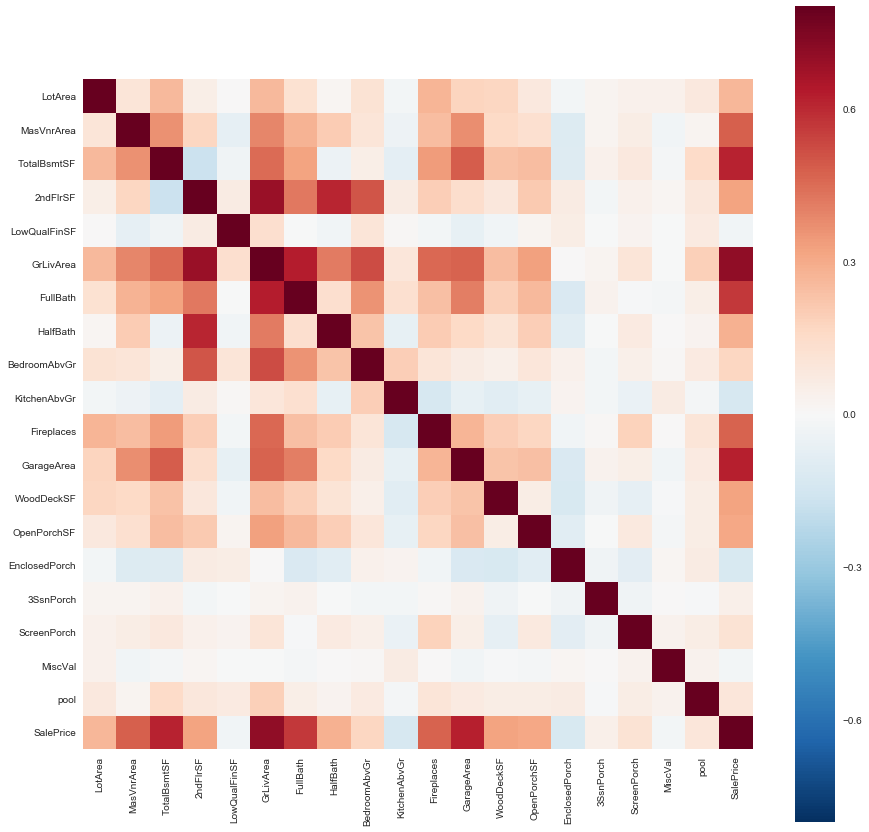

In [109]:
corrmat = data[numerical_columns].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='RdBu_r');

In [112]:
important_numerical_variables=['MasVnrArea','TotalBsmtSF','GrLivArea','FullBath','GarageArea','Fireplaces','SalePrice']

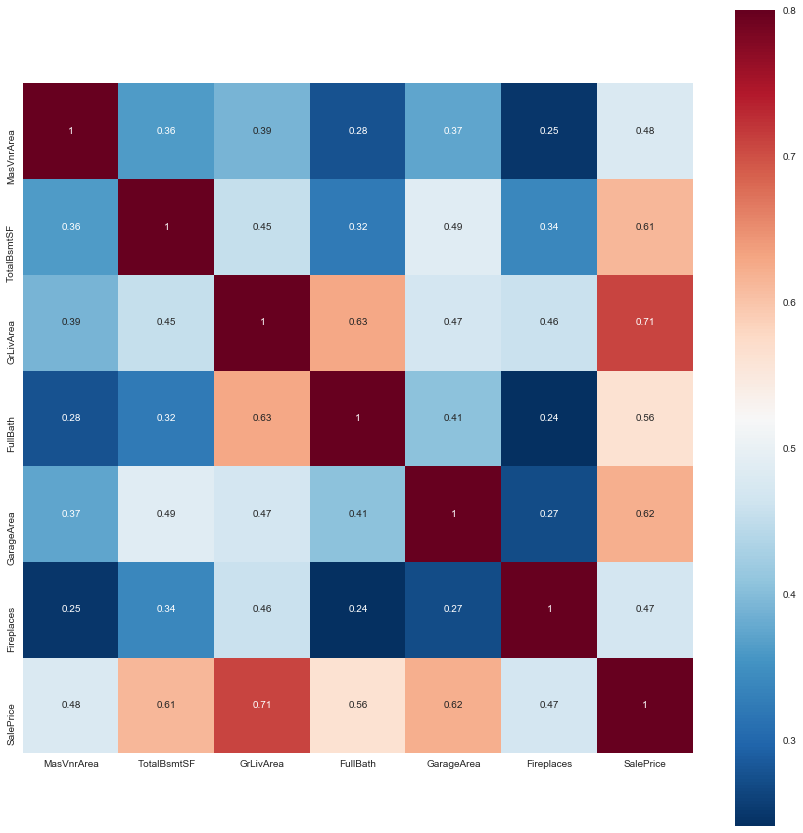

In [113]:
corrmat = data[important_numerical_variables].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='RdBu_r',annot=True);

We will kepp variable with correlation greater tha 0.5

In [114]:
important_numerical_variables.remove('MasVnrArea')
important_numerical_variables.remove('Fireplaces')


In [115]:
categorical_data=data[categorical_columns]

In [118]:
categorical_data=pd.get_dummies(categorical_data,drop_first=True)

In [119]:
categorical_data.shape

(1451, 172)

In [120]:
group = correlated_groups[2]
from sklearn.ensemble import RandomForestRegressor
features = list(group.feature2.unique())
rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
rf.fit(categorical_data, data['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=39,
           verbose=0, warm_start=False)

In [121]:
importance = pd.concat(
    [pd.Series(categorical_data.columns),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

feature  importance
2             OverallQual    0.862427
4            YearRemodAdd    0.021476
38   Neighborhood_NoRidge    0.014945
0              MSSubClass    0.014168
10            MSZoning_RM    0.012172
3               YearBuilt    0.008593
154        Functional_Mod    0.005214
30   Neighborhood_Edwards    0.005067
105   Exterior2nd_HdBoard    0.004664
14           LotShape_Reg    0.004043
143          CentralAir_Y    0.003496
106   Exterior2nd_ImStucc    0.002780
6                  MoSold    0.002425
91    Exterior1st_HdBoard    0.002383
9             MSZoning_RL    0.002297
131           BsmtQual_Gd    0.002221
116       MasVnrType_None    0.002038
164          SaleType_New    0.001860
76          RoofStyle_Hip    0.001713
119          ExterQual_Gd    0.001609
114   Exterior2nd_Wd Shng    0.001224
166           SaleType_WD    0.001220
22          LandSlope_Mod    0.001144
150        KitchenQual_TA    0.001044
45   Neighborhood_StoneBr    0.001013
98    Exterior1st_Wd Sdng    0.000986
40   Neighborhood_OldTown    0.000923
85       RoofMatl_WdShngl    0.000862
156        Functional_Typ    0.000727
88    Exterior1st_BrkFace    0.000708
..                    ...         ...
83       RoofMatl_Tar&Grv    0.000000
84       RoofMatl_WdShake    0.000000
87    Exterior1st_BrkComm    0.000000
103    Exterior2nd_CBlock    0.000000
34   Neighborhood_Mitchel    0.000000
101   Exterior2nd_Brk Cmn    0.000000
100   Exterior2nd_AsphShn    0.000000
99    Exterior1st_WdShing    0.000000
24   Neighborhood_Blueste    0.000000
26   Neighborhood_BrkSide    0.000000
95      Exterior1st_Stone    0.000000
80       RoofMatl_Membran    0.000000
20          LotConfig_FR3    0.000000
78         RoofStyle_Shed    0.000000
64        BldgType_Duplex    0.000000
89     Exterior1st_CBlock    0.000000
62        Condition2_RRNn    0.000000
130           BsmtQual_Fa    0.000000
129       Foundation_Wood    0.000000
63        BldgType_2fmCon    0.000000
127       Foundation_Slab    0.000000
65         BldgType_Twnhs    0.000000
75      RoofStyle_Gambrel    0.000000
66        BldgType_TwnhsE    0.000000
123          ExterCond_Po    0.000000
67      HouseStyle_1.5Unf    0.000000
72      HouseStyle_SFoyer    0.000000
118          ExterQual_Fa    0.000000
73        HouseStyle_SLvl    0.000000
86    Exterior1st_AsphShn    0.000000

[172 rows x 2 columns]

We can just OverallQual is important and we will keep this 

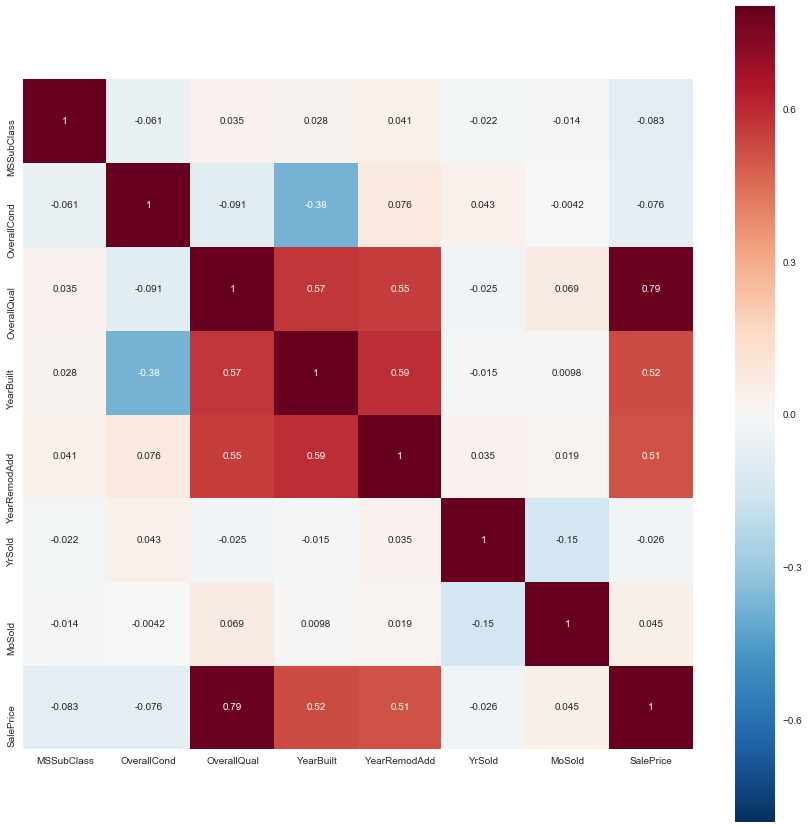

In [123]:
categorical_columns_SalePrice=categorical_columns.copy()
categorical_columns_SalePrice.append('SalePrice')
corrmat = data[categorical_columns_SalePrice].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='RdBu_r',annot=True);

The variables 'OverallQual','YearBuilt','YearReamodAdd' have strong correlation with sales Price

## Checking correlation of above variables

In [124]:
important_categorical_variables=['YearBuilt','YearRemodAdd','OverallQual','SalePrice']

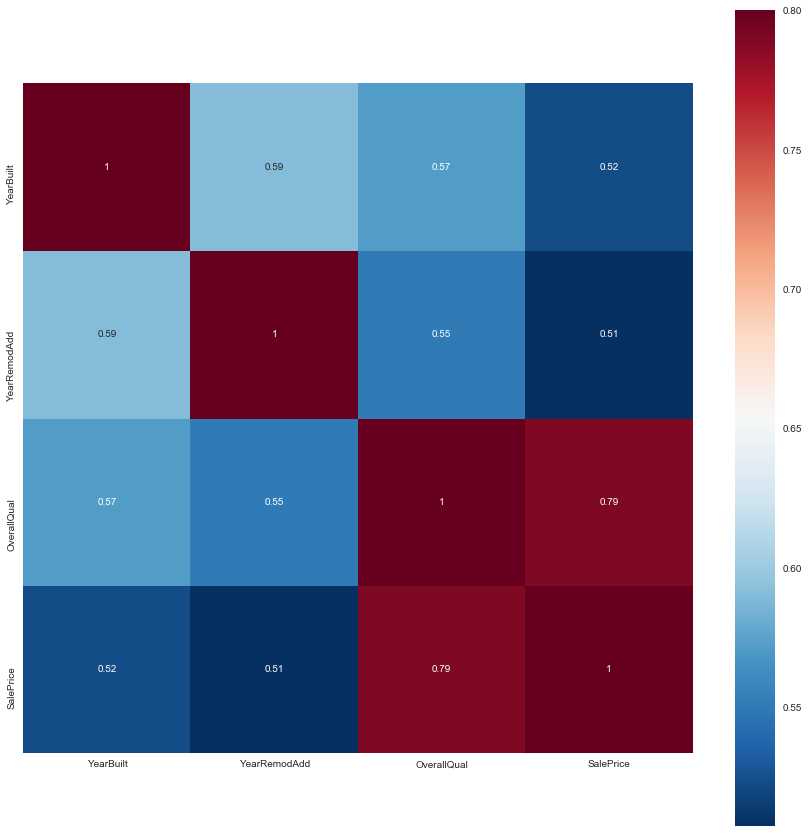

In [125]:
corrmat = data[important_categorical_variables].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='RdBu_r',annot=True);

# Checking boxplot of these important categorical variables

##  OverallQual vs SalesPrice

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


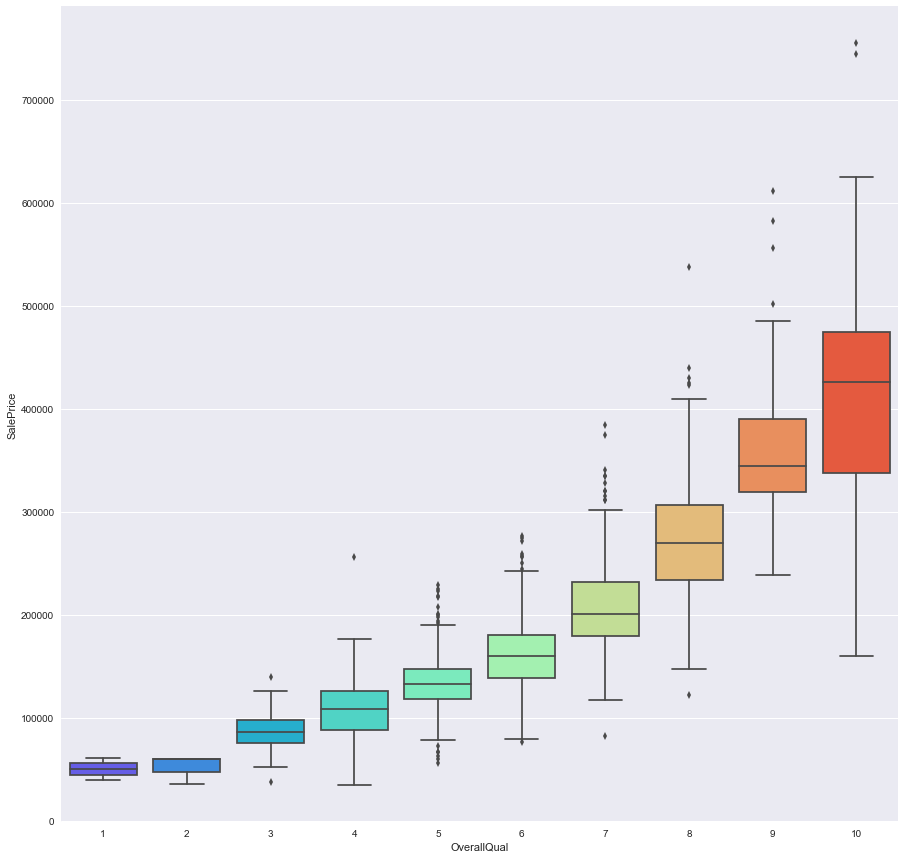

In [126]:
plt.figure(figsize=(15,15))
sns.boxplot(x="OverallQual", y="SalePrice", data=data,palette='rainbow')

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_model= ols('SalePrice ~ OverallQual',data=data).fit()
table = sm.stats.anova_lm(anova_model, typ=2) # Type 2 ANOVA DataFrame
print(table)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                   sum_sq      df            F         PR(>F)
OverallQual  5.693702e+12     1.0  2407.125083  2.825148e-310
Residual     3.427398e+12  1449.0          NaN            NaN


As OverallQual increases the SalesPrice also increases and also the F-statistics and pvalue from the ANOVA test suggest that there is a relation between OverallQual and SalePrice

## YearBuilt vs SalesPrice

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


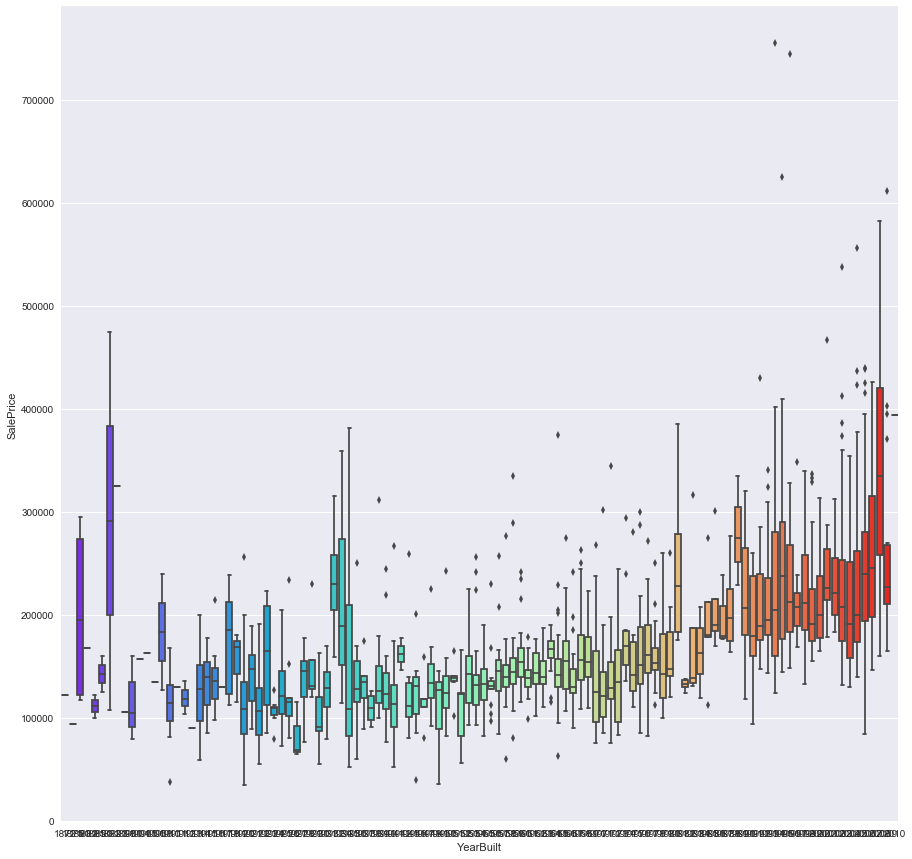

In [128]:
plt.figure(figsize=(15,15))
sns.boxplot(x="YearBuilt", y="SalePrice", data=data,palette='rainbow')

In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_model= ols('SalePrice ~ YearBuilt',data=data).fit()
table = sm.stats.anova_lm(anova_model, typ=2) # Type 2 ANOVA DataFrame
print(table)

                 sum_sq      df           F         PR(>F)
YearBuilt  2.497498e+12     1.0  546.360599  8.518406e-103
Residual   6.623602e+12  1449.0         NaN            NaN


We can see a general trend , if the house is built recently then there is a higher SalePrice

# YearRemodAdd vs SalesPrice

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


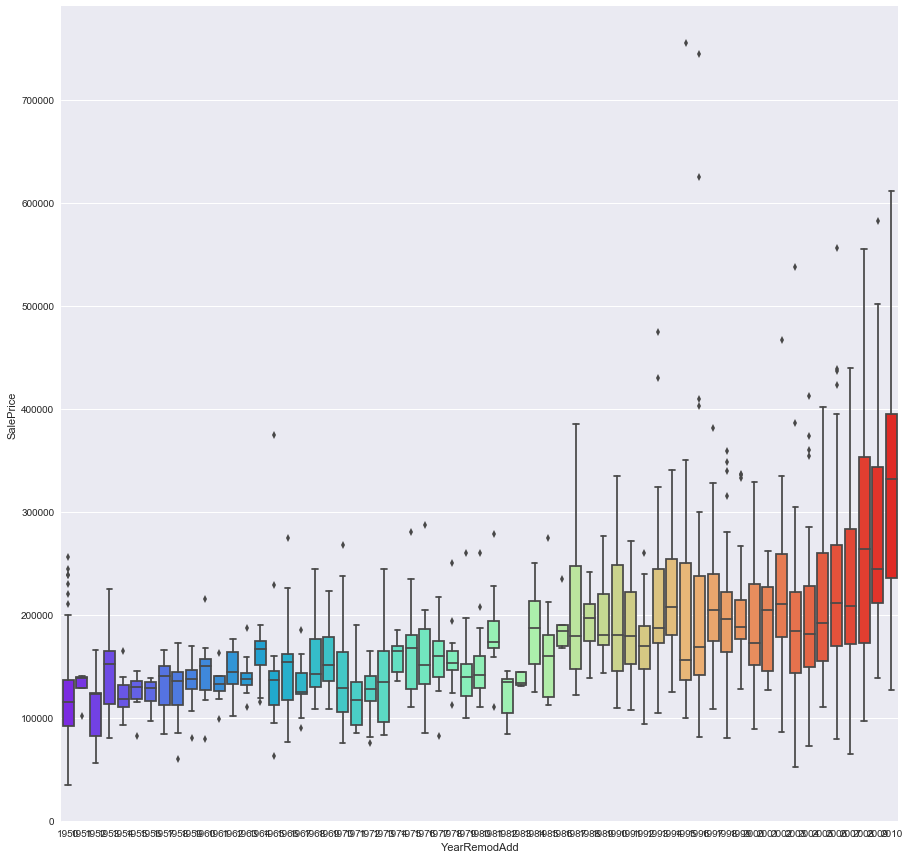

In [130]:

plt.figure(figsize=(15,15))
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=data,palette='rainbow')

We can see a general trend , if the house is remodelled then there is a higher SalePrice

In [131]:
remodelled_data=data['YearRemodAdd']-data['YearBuilt']
remodelled_flag= [0 if diff==0 else 1 for diff in remodelled_data]

In [132]:
data['remodelled_flag']=remodelled_flag

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


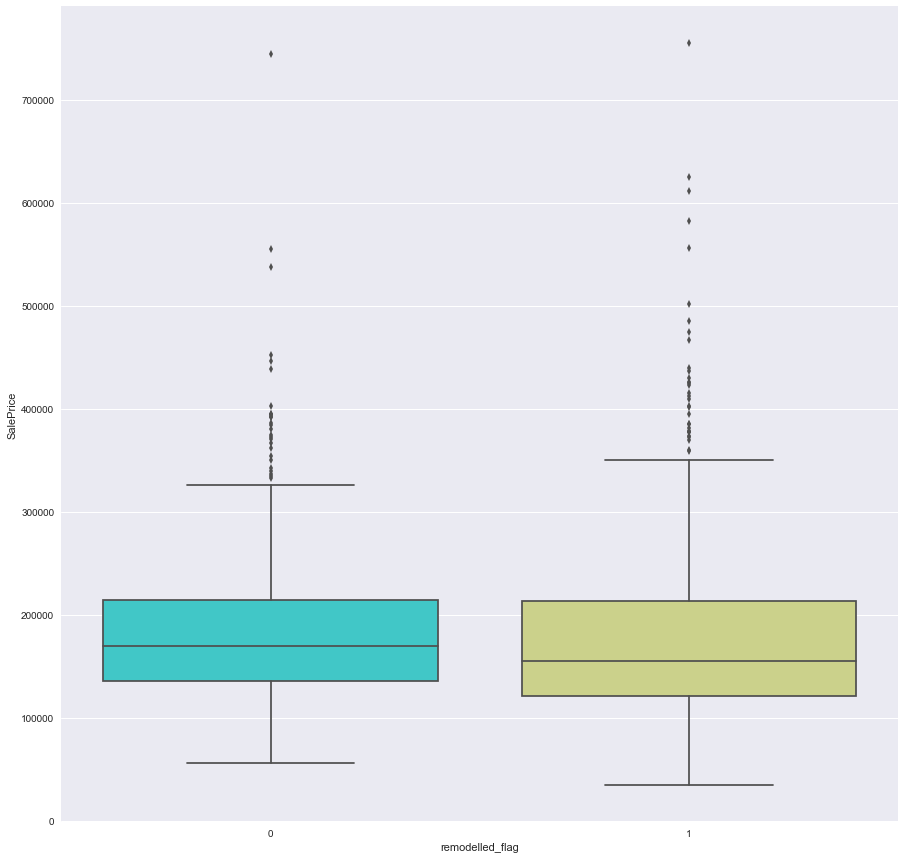

In [133]:

plt.figure(figsize=(15,15))
sns.boxplot(x="remodelled_flag", y="SalePrice", data=data,palette='rainbow')

As we can see that there isnt much difference in SalePrice if the house is remodelled or not, hence we will consider just the YearBuilt for our analysis

In [134]:
del(data['remodelled_flag'])

In [135]:
display(data[categorical_columns].head())

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL   Pave      Reg         Lvl       FR2       Gtl      Veenker   
2       RL   Pave      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL   Pave      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL   Pave      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual Heating  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   
1     MetalSd       None        TA        TA     CBlock       Gd    GasA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   
3     Wd Shng       None        TA        TA     BrkTil       TA    GasA   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0        Ex          Y      SBrkr          Gd        Typ          Y       WD   
1        Ex          Y      SBrkr          TA        Typ          Y       WD   
2        Ex          Y      SBrkr          Gd        Typ          Y       WD   
3        Gd          Y      SBrkr          Gd        Typ          Y       WD   
4        Ex          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  MSSubClass  OverallCond  OverallQual  YearBuilt  \
0        Normal          60            5            7       2003   
1        Normal          20            8            6       1976   
2        Normal          60            5            7       2001   
3       Abnorml          70            5            7       1915   
4        Normal          60            5            8       2000   

   YearRemodAdd  YrSold  MoSold  
0          2003    2008       2  
1          1976    2007       5  
2          2002    2008       9  
3          1970    2006       2  
4          2000    2008      12

Based on general idea, we know that neighborhood can be a factor that will decide the SalePrice we will take Neighborhood and use it after applying one hot encoding

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


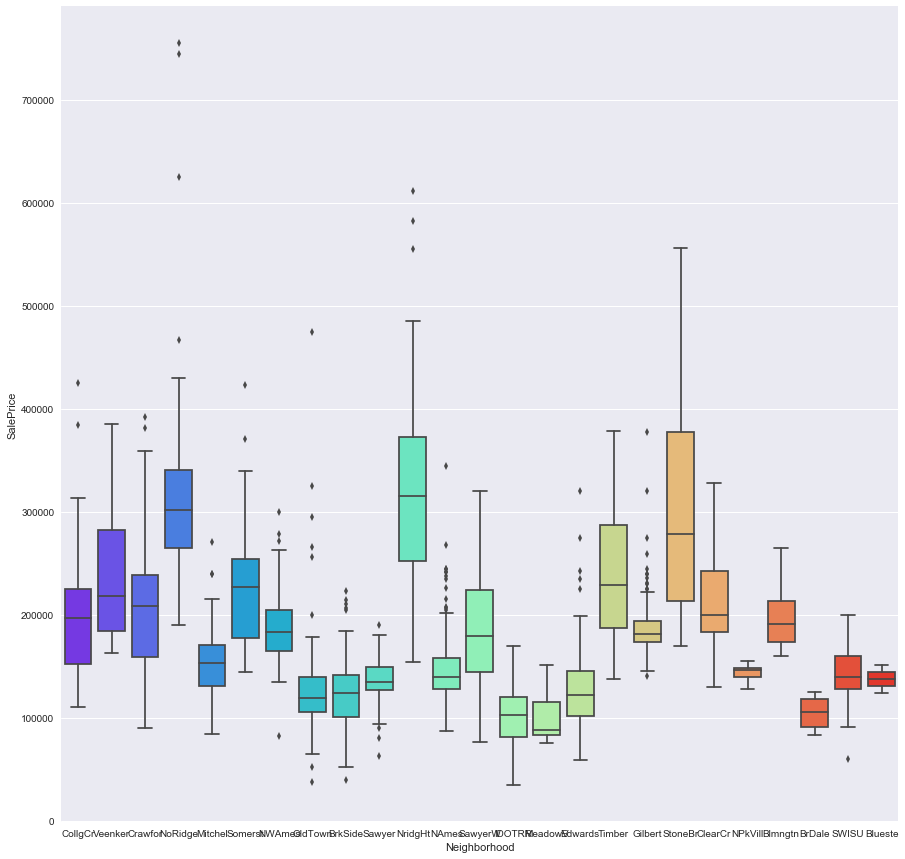

In [136]:

plt.figure(figsize=(15,15))
sns.boxplot(x="Neighborhood", y="SalePrice", data=data,palette='rainbow')

In [137]:
important_numerical_variables

['TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea', 'SalePrice']

In [141]:
data.shape

(1451, 56)

In [151]:
final_variables=important_numerical_variables.copy()
final_variables.append('OverallQual')
final_variables.remove('SalePrice')
final_variables.append('SalePrice')
final_variables

['TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'GarageArea',
 'OverallQual',
 'SalePrice']

In [152]:
data_important_features=data[final_variables]

In [153]:
data_important_features.head()

TotalBsmtSF  GrLivArea  FullBath  GarageArea  OverallQual  SalePrice
0          856       1710         2         548            7     208500
1         1262       1262         2         460            6     181500
2          920       1786         2         608            7     223500
3          756       1717         1         642            7     140000
4         1145       2198         2         836            8     250000

In [154]:
data_important_features.isnull().sum()

TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageArea     0
OverallQual    0
SalePrice      0
dtype: int64

There are no missing values in the variables selected

# Checking the distributions

In [155]:
data_important_features.describe()

TotalBsmtSF    GrLivArea     FullBath   GarageArea  OverallQual  \
count  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000   
mean   1056.310131  1514.174363     1.562371   472.525155     6.093728   
std     437.914609   525.799521     0.550301   214.171752     1.381467   
min       0.000000   334.000000     0.000000     0.000000     1.000000   
25%     795.000000  1128.000000     1.000000   327.500000     5.000000   
50%     991.000000  1464.000000     2.000000   478.000000     6.000000   
75%    1297.500000  1776.000000     2.000000   576.000000     7.000000   
max    6110.000000  5642.000000     3.000000  1418.000000    10.000000   

           SalePrice  
count    1451.000000  
mean   180624.101999  
std     79312.128273  
min     34900.000000  
25%    129900.000000  
50%    162500.000000  
75%    214000.000000  
max    755000.000000

## TotalBsmtSF

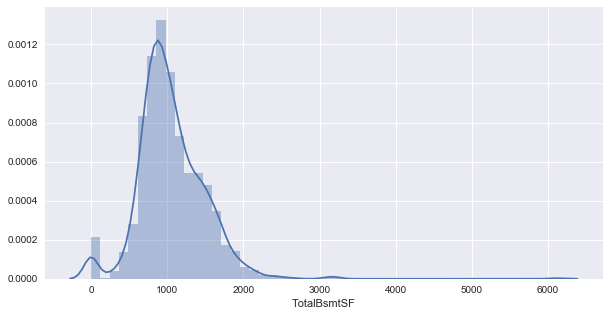

In [156]:
from scipy import stats
plt.figure(figsize=(10,5))
sns.distplot(data_important_features['TotalBsmtSF'])

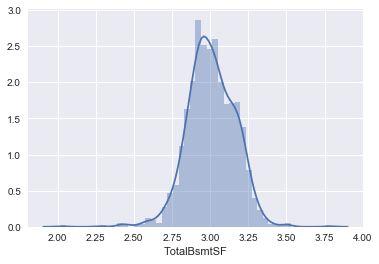

In [157]:
sns.distplot(np.log10(data_important_features[data_important_features['TotalBsmtSF']>0]['TotalBsmtSF']));


TotalBsmt =0 means that there is no basement, and we say that if we ignore that 0, the TotalBsmt is right skewed and hence we do a long transformation

## GrLivArea

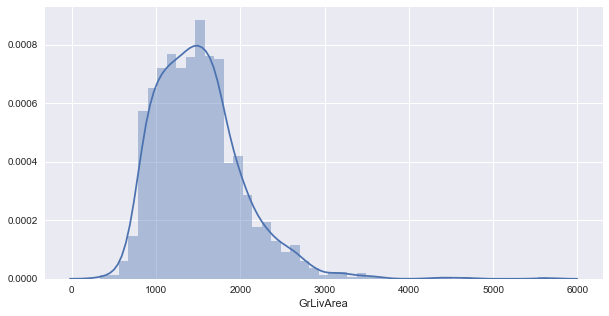

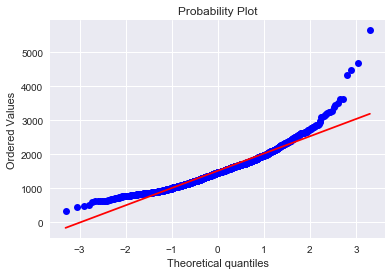

In [158]:
plt.figure(figsize=(10,5))
sns.distplot(data_important_features['GrLivArea'])
fig = plt.figure()
res = stats.probplot(data_important_features['GrLivArea'], plot=plt)

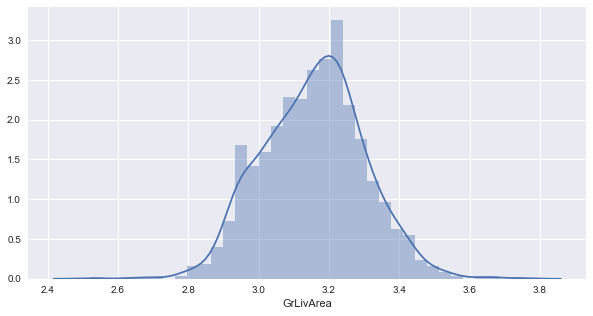

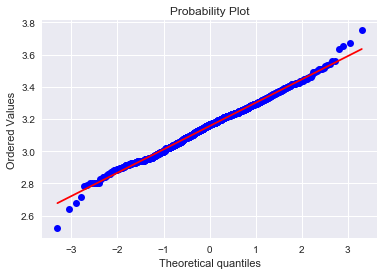

In [159]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(data_important_features['GrLivArea']))
fig = plt.figure()
res = stats.probplot(np.log10(data_important_features['GrLivArea']), plot=plt)

So here after log transformation we see that GrLivArea is normal , hence we will do log transformation on the GrLivArea

## GarageArea

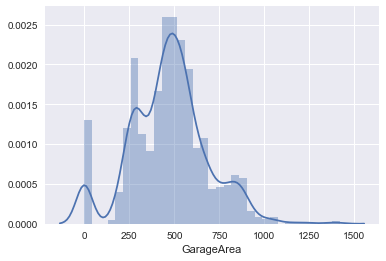

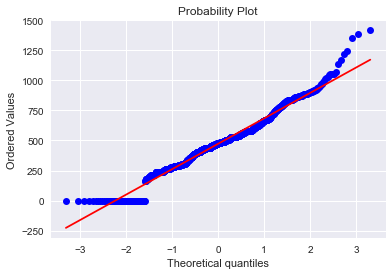

In [160]:
from scipy import stats
sns.distplot(data_important_features['GarageArea'])
fig = plt.figure()
res = stats.probplot(data_important_features['GarageArea'], plot=plt)

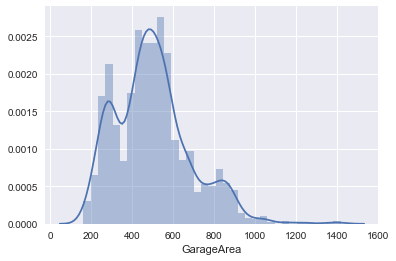

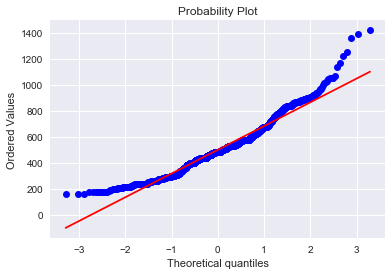

In [161]:
sns.distplot((data_important_features[data_important_features['GarageArea']>0]['GarageArea']));
fig = plt.figure()
res = stats.probplot((data_important_features[data_important_features['GarageArea']>0]['GarageArea']), plot=plt)

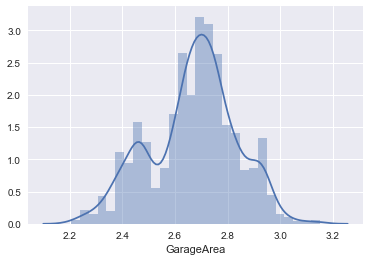

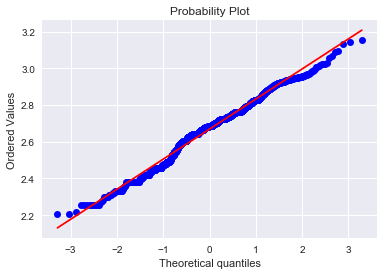

In [162]:
sns.distplot(np.log10(data_important_features[data_important_features['GarageArea']>0]['GarageArea']));
fig = plt.figure()
res = stats.probplot(np.log10(data_important_features[data_important_features['GarageArea']>0]['GarageArea']), plot=plt)

So here after log transformation we see that GarageArea is normal , hence we will do log transformation on the GarageArea

In [163]:
data_important_features['SalePrice']=np.log(data_important_features['SalePrice'])

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
data_important_features['GrLivArea']=np.log(data_important_features['GrLivArea'])


/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:

data_important_features['TotalBsmtSF'] = [np.log(val) if val != 0 else 0 for val in data_important_features['TotalBsmtSF']]
data_important_features['GarageArea'] = [np.log(val) if val != 0 else 0 for val in data_important_features['GarageArea']]

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Finding Relationship of Independent Variable vs SalePrice(Target) and Outlier Analysis

In [166]:
data_important_features.head()

TotalBsmtSF  GrLivArea  FullBath  GarageArea  OverallQual  SalePrice
0     6.752270   7.444249         2    6.306275            7  12.247694
1     7.140453   7.140453         2    6.131226            6  12.109011
2     6.824374   7.487734         2    6.410175            7  12.317167
3     6.628041   7.448334         1    6.464588            7  11.849398
4     7.043160   7.695303         2    6.728629            8  12.429216

## TotalBsmtSF vs SalePrice

Text(0,0.5,'SalePrice')

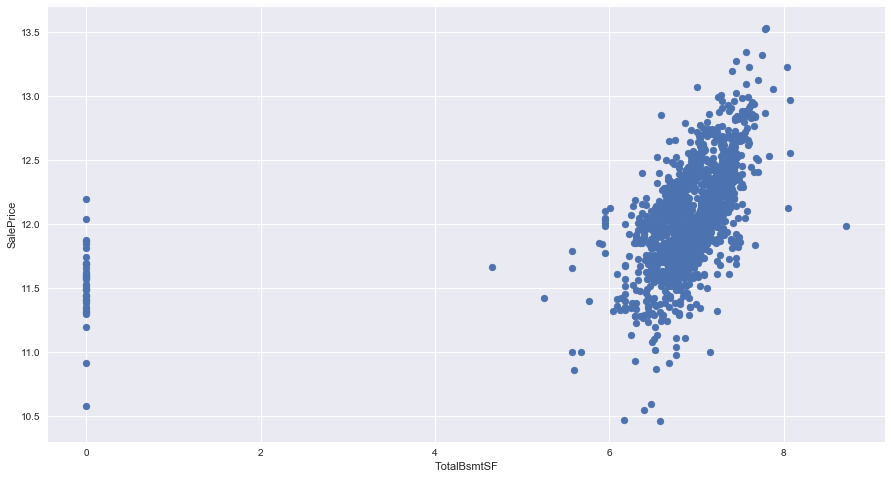

In [167]:
plt.figure(figsize=(15,8))
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=data_important_features)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

The point to the extreme right where SalePrice is 5.2 looks like an outlier as it is not along the trend line. That is the maximum TotalBsmtSF

In [168]:
data_important_features['TotalBsmtSF'].describe()

count    1451.000000
mean        6.747877
std         1.148402
min         0.000000
25%         6.678342
50%         6.898715
75%         7.168195
max         8.717682
Name: TotalBsmtSF, dtype: float64

In [169]:
max_index=data_important_features['TotalBsmtSF'].idxmax(axis=1)

In [170]:
data_important_features.drop(max_index,axis=0,inplace=True)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'SalePrice')

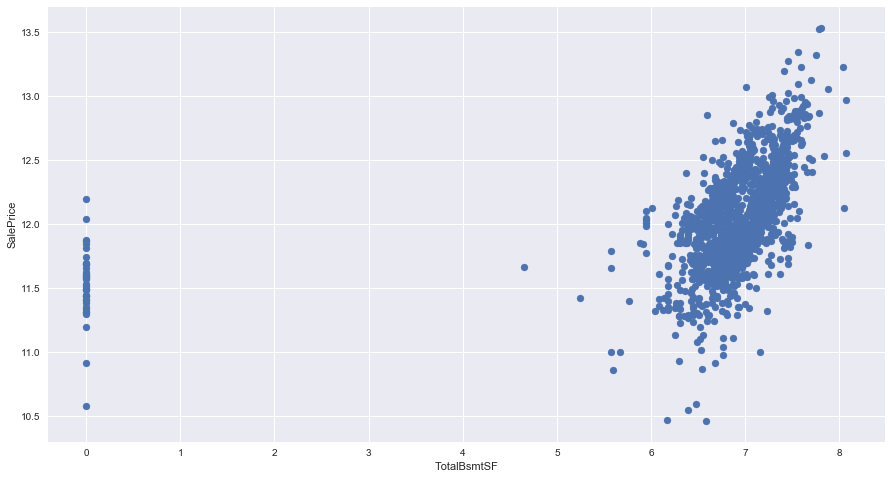

In [171]:
plt.figure(figsize=(15,8))
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=data_important_features)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

## GrLivArea vs SalePrice

Text(0,0.5,'SalePrice')

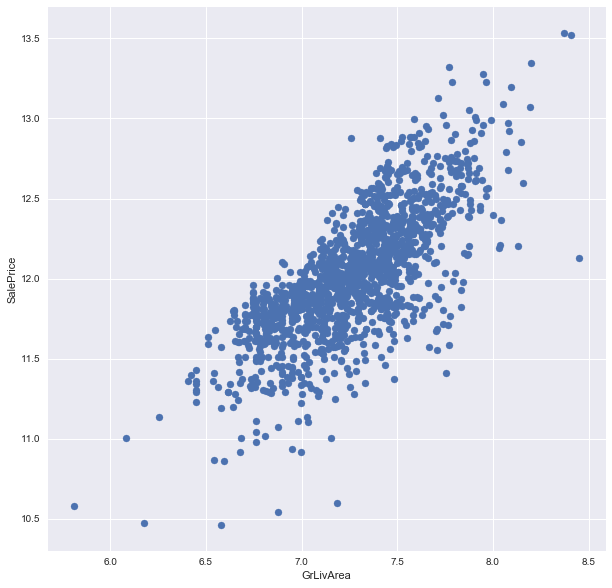

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(x='GrLivArea',y='SalePrice',data=data_important_features)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

The maximum GrLiveArea looks like an outlier as it is not along the trend

In [173]:
max_index=data_important_features['GrLivArea'].idxmax(axis=1)

In [174]:
data_important_features.drop(max_index,axis=0,inplace=True)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'SalePrice')

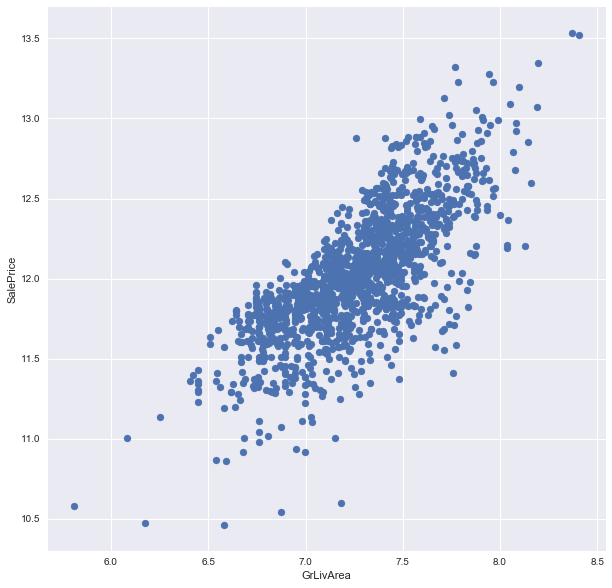

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(x='GrLivArea',y='SalePrice',data=data_important_features)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

GarageArea vs SalePrice

Text(0,0.5,'SalePrice')

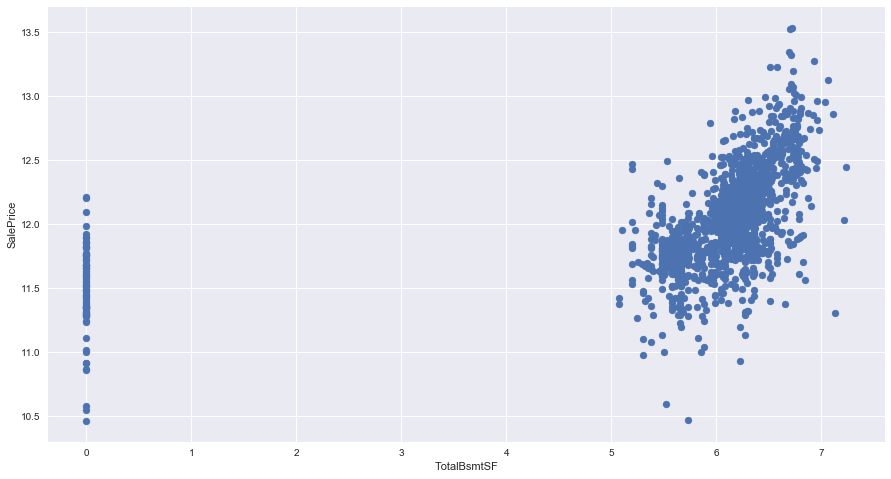

In [176]:
plt.figure(figsize=(15,8))
plt.scatter(x='GarageArea',y='SalePrice',data=data_important_features)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [177]:
data_important_features.head()

TotalBsmtSF  GrLivArea  FullBath  GarageArea  OverallQual  SalePrice
0     6.752270   7.444249         2    6.306275            7  12.247694
1     7.140453   7.140453         2    6.131226            6  12.109011
2     6.824374   7.487734         2    6.410175            7  12.317167
3     6.628041   7.448334         1    6.464588            7  11.849398
4     7.043160   7.695303         2    6.728629            8  12.429216

# Train Test Split

In [179]:
X = data_important_features.iloc[:, :-1].values
y = data_important_features.iloc[:, 5].values

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Building

## Multiple Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression


In [184]:
regressor_multiple=LinearRegression()
regressor_multiple.fit(X_train,y_train)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [185]:
y_predict_multiple=regressor_multiple.predict(X_test)

In [186]:
from sklearn.metrics import r2_score,mean_squared_error

In [188]:
R_squared_log_multiple=r2_score(y_test,y_predict_multiple)
R_squared_multiple=r2_score(np.exp(y_test),np.exp(y_predict_multiple))
print("LOG:",R_squared_log_multiple)
print("Actual:",R_squared_multiple)

LOG: 0.8042913265142897
Actual: 0.8260204607777926


In [190]:
MSE_log_multiple=mean_squared_error(y_test,y_predict_multiple)
MSE_multiple=mean_squared_error(np.exp(y_test),np.exp(y_predict_multiple))
print("LOG:",MSE_log_multiple)
print("Actual:",MSE_multiple)

LOG: 0.0327133173959204
Actual: 1039597060.8231553


In [191]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_multiple, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.7803589616862486
0.05157339288490685


Text(0.5,1,'Multiple Regression')

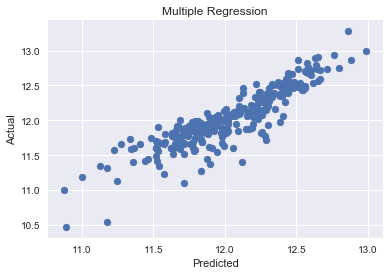

In [192]:
plt.scatter(x=y_predict_multiple,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiple Regression')

Text(0.5,1,'Multiple Regression')

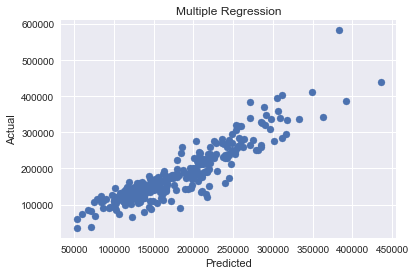

In [196]:
plt.scatter(x=np.exp(y_predict_multiple),y=np.exp(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiple Regression')

## Choosig Parameters using backward Elimination

In [197]:
import statsmodels.formula.api as sm

def backwardElimination(X, y, sl):
    numVars = X.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    X.drop(X.columns[j], axis = 1, inplace = True)
    print(regressor_OLS.summary())
    return X
 
SL = 0.05
X_OLS = backwardElimination(X, y, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.826e+05
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:08:58   Log-Likelihood:                -451.23
No. Observations:                1449   AIC:                             912.5
Df Residuals:                    1444   BIC:                             938.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0670      0.008      8.276      0.0

## Multiple Linear Regression With Best Parameters

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [199]:
regressor_multiple_best_params=LinearRegression()
regressor_multiple_best_params.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
y_predict_multiple_best=regressor_multiple_best_params.predict(X_test)

In [201]:
R_squared_log_multiple_best=r2_score(y_test,y_predict_multiple_best)
R_squared_multiple_best=r2_score(np.exp(y_test),np.exp(y_predict_multiple_best))
print("Log:",R_squared_log_multiple_best)
print("Actual:",R_squared_multiple_best)

Log: 0.8042913265142897
Actual: 0.8260204607777926


In [202]:
MSE_log_multiple_best=mean_squared_error(y_test,y_predict_multiple_best)
MSE_multiple_best=mean_squared_error(np.exp(y_test),np.exp(y_predict_multiple_best))
print("LOG:",MSE_log_multiple_best)
print("Actual:",MSE_multiple_best)

LOG: 0.0327133173959204
Actual: 1039597060.8231553


In [204]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_multiple_best_params, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


0.7803589616862486
0.05157339288490685


## Polynomial Regression

## degree2

In [205]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)


In [206]:
X_poly = poly_reg.fit_transform(X)


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [208]:
polynomial_regressor=LinearRegression()
polynomial_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [209]:
y_predict_polynomial=polynomial_regressor.predict(X_test)

In [210]:
R_squared_log_polynomial=r2_score(y_test,y_predict_polynomial)
R_squared_polynomial=r2_score(np.exp(y_test),np.exp(y_predict_polynomial))
print("Log:",R_squared_log_polynomial)
print("Actual:",R_squared_polynomial)

Log: 0.8331743584200245
Actual: 0.8652193833031018


In [211]:
MSE_log_polynomial=mean_squared_error(y_test,y_predict_polynomial)
MSE_polynomial=mean_squared_error(np.exp(y_test),np.exp(y_predict_polynomial))
print("LOG:",MSE_log_polynomial)
print("Actual:",MSE_polynomial)

LOG: 0.0278854282009237
Actual: 805367881.7660792


In [212]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = polynomial_regressor, X = X_train, y = y_train, cv = 10)
abs(accuracies).mean()


0.8226538677970664

## Lasso Regression

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [215]:
from sklearn.model_selection import GridSearchCV
lasso_regressor=Lasso(random_state=0)


In [216]:
parameters = [{'alpha': [0.1, 0.5, 1,1.5,2,3,4]}]
grid_search_lasso = GridSearchCV(estimator = lasso_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_lasso.fit(X_train, y_train)
best_accuracy = grid_search_lasso.best_score_
best_parameters_lasso = grid_search_lasso.best_params_


In [217]:
best_parameters_lasso

{'alpha': 0.1}

In [218]:
best_accuracy

-0.05834521741931703

In [219]:
parameters = [{'alpha': [0.00001, 0.0001,0.001,0.01, 1,1.5,2,3,4,10,100]}]
grid_search_lasso = GridSearchCV(estimator = lasso_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_lasso.fit(X_train, y_train)
best_accuracy = grid_search_lasso.best_score_
best_parameters_lasso = grid_search_lasso.best_params_


In [220]:
best_parameters_lasso

{'alpha': 1e-05}

In [221]:
best_accuracy

-0.03375092310723968

In [222]:
lasso_regressor=Lasso(random_state=0,alpha=0.00001)
lasso_regressor.fit(X_train,y_train)
y_predicted_lasso=lasso_regressor.predict(X_test)

In [223]:
R_squared_log_lasso=r2_score(y_test,y_predicted_lasso)
R_squared_lasso=r2_score(np.exp(y_test),np.exp(y_predicted_lasso))
print("Log:",R_squared_log_lasso)
print("Actual:",R_squared_lasso)

Log: 0.8043075138410525
Actual: 0.8260247706529222


In [224]:
MSE_log_lasso=mean_squared_error(y_test,y_predicted_lasso)
MSE_lasso=mean_squared_error(np.exp(y_test),np.exp(y_predicted_lasso))
print("LOG:",MSE_log_lasso)
print("Actual:",MSE_lasso)

LOG: 0.03271061163358115
Actual: 1039571307.6021886


In [225]:
lasso_regressor.coef_

array([0.04111847, 0.42707522, 0.05391031, 0.03811637, 0.13556677])

# Ridge Regression

In [226]:
from sklearn.linear_model import Ridge

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [228]:
regressor_ridge=Ridge(random_state=0)

In [229]:
parameters = [{'alpha': [0.00001, 0.0001,0.001,0.01, 1,1.5,2,3,4,10,100]}]
grid_search_ridge = GridSearchCV(estimator = regressor_ridge,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_ridge.fit(X_train, y_train)
best_accuracy = grid_search_ridge.best_score_
best_parameters_lasso = grid_search_ridge.best_params_


In [230]:
print(best_accuracy)
print(best_parameters_lasso)

-0.033750890799041165
{'alpha': 0.01}


In [231]:
regressor_ridge=grid_search_ridge.best_estimator_
y_predict_ridge=regressor_ridge.predict(X_test)

In [232]:
R_squared_log_ridge=r2_score(y_test,y_predict_ridge)
R_squared_ridge=r2_score(np.exp(y_test),np.exp(y_predict_ridge))
print("Log:",R_squared_log_ridge)
print("Actual:",R_squared_ridge)

Log: 0.8042978197141338
Actual: 0.8260226979418405


In [233]:
MSE_log_ridge=mean_squared_error(y_test,y_predict_ridge)
MSE_ridge=mean_squared_error(np.exp(y_test),np.exp(y_predict_ridge))
print("LOG:",MSE_log_lasso)
print("Actual:",MSE_lasso)

LOG: 0.03271061163358115
Actual: 1039571307.6021886


# Decision Tree

In [234]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
decision_tree_regressor=DecisionTreeRegressor(random_state=0)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [237]:
parameters = [{'max_depth': [2,3,4,5,6,7,8,9,10,20,30,40,50],'min_samples_split':[2,3,4,5,6,7,8,9,10],'max_features':['auto','sqrt','log2']}]
grid_search_decision = GridSearchCV(estimator = decision_tree_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_decision.fit(X_train, y_train)
best_accuracy = grid_search_decision.best_score_
best_parameters_lasso = grid_search_decision.best_params_


In [238]:
best_accuracy

-0.034620438478370937

In [239]:
best_parameters_lasso

{'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 3}

In [240]:
regressor_decision=grid_search_decision.best_estimator_
y_predict_decision=regressor_decision.predict(X_test)

In [241]:
R_squared_log_decision=r2_score(y_test,y_predict_decision)
R_squared_decision=r2_score(np.exp(y_test),np.exp(y_predict_decision))
print("Log:",R_squared_log_decision)
print("Actual:",R_squared_decision)

Log: 0.7654908510343397
Actual: 0.7856624885133493


In [242]:
MSE_log_decision=mean_squared_error(y_test,y_predict_decision)
MSE_decision=mean_squared_error(np.exp(y_test),np.exp(y_predict_decision))
print("LOG:",MSE_log_decision)
print("Actual:",MSE_decision)

LOG: 0.03919893832871422
Actual: 1280752023.8404512


## Random Forest

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
random_forest_regressor=RandomForestRegressor(random_state=0)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [246]:
parameters = [{'max_depth': [5,10,20,50,100],
               'min_samples_split':[2,3,4,5],
               'max_features':['auto','sqrt','log2'],
              'n_estimators':[10,20,30,50,100,200,500]}]
grid_search_decision = GridSearchCV(estimator = random_forest_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_decision.fit(X_train, y_train)
best_accuracy = grid_search_decision.best_score_
best_parameters_lasso = grid_search_decision.best_params_


In [247]:
best_accuracy

-0.02740125599041249

In [248]:
best_parameters_lasso

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 200}

In [249]:
parameters = [{'max_depth': [40,45,50,55,60],
               'min_samples_split':[2,3,4,5],
               'max_features':[5,10,15],
              'n_estimators':[100,150,200,250,500]}]
grid_search_random_forest = GridSearchCV(estimator = random_forest_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_decision.fit(X_train, y_train)
best_accuracy = grid_search_decision.best_score_
best_parameters_lasso = grid_search_decision.best_params_


In [250]:
print(best_accuracy)
print(best_parameters_lasso)

-0.02740125599041249
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 200}


In [251]:
random_forest_regressor=grid_search_decision.best_estimator_
y_predicted_random_forest=random_forest_regressor.predict(X_test)

In [252]:
R_squared_log_random_forest=r2_score(y_test,y_predicted_random_forest)
R_squared_random_forest=r2_score(np.exp(y_test),np.exp(y_predicted_random_forest))
print("Log:",R_squared_log_random_forest)
print("Actual:",R_squared_random_forest)

Log: 0.8347994889871384
Actual: 0.8551228604577409


In [253]:
MSE_log_random_forest=mean_squared_error(y_test,y_predicted_random_forest)
MSE_random_forest=mean_squared_error(np.exp(y_test),np.exp(y_predicted_random_forest))
print("LOG:",MSE_log_random_forest)
print("Actual:",MSE_random_forest)

LOG: 0.027613782539518246
Actual: 865698628.2521071


In [286]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(silent=True)
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [291]:
parameters = [{'learning_rate':[0.8,0.9,1,1.1,1.2],
               'max_depth': [2,3,4,5,6,7,8,9,10],'n_estimators':[50,100,150,200,500]}]
grid_search_decision = GridSearchCV(estimator = xgb_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_decision.fit(X_train, y_train)
best_accuracy = grid_search_decision.best_score_
best_parameters_lasso = grid_search_decision.best_params_


In [292]:
best_parameters_lasso

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [282]:
y_predicted_xgb=xgb_regressor.predict(X_test)

In [283]:
R_squared_log_xgb=r2_score(y_test,y_predicted_xgb)
R_squared_xgb=r2_score(np.exp(y_test),np.exp(y_predicted_xgb))
print("Log:",R_squared_log_xgb)
print("Actual:",R_squared_xgb)

Log: 0.8242995407856616
Actual: 0.8565427288851759


In [273]:
test_data=pd.read_csv('test.csv')

In [274]:
Id=tes_data['Id']

In [256]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [257]:
test_data['GrLivArea']=np.log(test_data['GrLivArea'])
test_data['TotalBsmtSF'] = [np.log(val) if val != 0 else 0 for val in test_data['TotalBsmtSF']]
test_data['GarageArea'] = [np.log(val) if val != 0 else 0 for val in test_data['GarageArea']]

In [273]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0     6.782192   
1          ALQ       923.0          Unf         0.0      406.0     7.192182   
2          GLQ       791.0          Unf         0.0      137.0     6.833032   
3          GLQ       602.0          Unf         0.0      324.0     6.830874   
4          ALQ       263.0          Unf         0.0     1017.0     7.154615   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   6.797940           0.0           0.0         1         0             2   
1   7.192182           0.0           0.0         1         1             3   
2   7.395722           0.0           0.0         2         1             3   
3   7.380256           0.0           0.0         2         1             3   
4   7.154615           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [260]:
test_final_variables=final_variables.copy()
test_final_variables.remove('SalePrice')
test_data=test_data[test_final_variables]

In [261]:
test_data

TotalBsmtSF  GrLivArea  FullBath  GarageArea  OverallQual
0     6.782192   6.797940         1    6.593045            5
1     7.192182   7.192182         1    5.743003            6
2     6.833032   7.395722         2    6.177944            5
3     6.830874   7.380256         2    6.152733            6
4     7.154615   7.154615         2    6.226537            8

In [262]:
test_data.isnull().sum()

TotalBsmtSF    1
GrLivArea      0
FullBath       0
GarageArea     1
OverallQual    0
dtype: int64

In [263]:
test_data.describe()

TotalBsmtSF    GrLivArea     FullBath   GarageArea  OverallQual
count  1458.000000  1459.000000  1459.000000  1458.000000  1459.000000
mean      6.714643     7.253745     1.570939     5.818800     6.078821
std       1.205838     0.316152     0.555190     1.416545     1.436812
min       0.000000     6.008813     0.000000     0.000000     1.000000
25%       6.664409     7.018849     1.000000     5.762051     5.000000
50%       6.895683     7.266827     2.000000     6.173786     6.000000
75%       7.173957     7.450661     2.000000     6.356108     7.000000
max       8.536015     8.536015     4.000000     7.305188    10.000000

In [268]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(test_data.iloc[:, [0,3]])
test_data.iloc[:, [0,3]] = imputer.transform(test_data.iloc[:, [0,3]])

In [269]:
test_data.describe()

TotalBsmtSF    GrLivArea     FullBath   GarageArea  OverallQual
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000
mean      6.714643     7.253745     1.570939     5.818800     6.078821
std       1.205425     0.316152     0.555190     1.416059     1.436812
min       0.000000     6.008813     0.000000     0.000000     1.000000
25%       6.664409     7.018849     1.000000     5.762051     5.000000
50%       6.895683     7.266827     2.000000     6.173786     6.000000
75%       7.173191     7.450661     2.000000     6.356108     7.000000
max       8.536015     8.536015     4.000000     7.305188    10.000000

In [271]:
y_final_predicted=random_forest_regressor.predict(test_data)

In [272]:
y_final_predicted

array([11.78235129, 11.89899799, 11.96536144, ..., 11.87917195,
       11.54295571, 12.34929752])

In [279]:
d={'Id':Id,'SalePrice':np.exp(y_final_predicted)}
output=pd.DataFrame(d)

In [280]:
output.to_csv("Output.csv")